In [3]:
import pandas as pd
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
from scipy.optimize import minimize
import scipy
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/4.1/Resources/'
import rpy2
from rpy2.robjects.packages import importr
from rpy2.robjects.packages import SignatureTranslatedAnonymousPackage
from rpy2.robjects.vectors import FloatVector
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [4]:
file_folder_path = "/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/"
file1 = pd.read_csv(file_folder_path + "ou_cal_medium16_1_result.csv", index_col=[0])
file2 = pd.read_csv(file_folder_path + "ou_cal_medium16_2_result.csv", index_col=[0])
file3 = pd.read_csv(file_folder_path + "ou_cal_medium16_3_result.csv", index_col=[0])
file4 = pd.read_csv(file_folder_path + "ou_cal_medium16_4_result.csv", index_col=[0])
file5 = pd.read_csv(file_folder_path + "ou_cal_medium16_5_result.csv", index_col=[0])
file6 = pd.read_csv(file_folder_path + "ou_cal_medium16_6_result.csv", index_col=[0])
file7 = pd.read_csv(file_folder_path + "ou_cal_medium16_7_result.csv", index_col=[0])
file8 = pd.read_csv(file_folder_path + "ou_cal_medium16_8_result.csv", index_col=[0])
file9 = pd.read_csv(file_folder_path + "ou_cal_medium16_9_result.csv", index_col=[0])
file10 = pd.read_csv(file_folder_path + "ou_cal_medium16_10_result.csv", index_col=[0])
file11 = pd.read_csv(file_folder_path + "ou_cal_medium16_11_result.csv", index_col=[0])
file12 = pd.read_csv(file_folder_path + "ou_cal_medium16_12_result.csv", index_col=[0])
file13 = pd.read_csv(file_folder_path + "ou_cal_medium16_13_result.csv", index_col=[0])
file14 = pd.read_csv(file_folder_path + "ou_cal_medium16_14_result.csv", index_col=[0])
file15 = pd.read_csv(file_folder_path + "ou_cal_medium16_15_result.csv", index_col=[0])
file16 = pd.read_csv(file_folder_path + "ou_cal_medium16_16_result.csv", index_col=[0])
file16_2 = pd.read_csv(file_folder_path + "ou_cal_medium16_16_result_2.csv", index_col=[0])

file01 = pd.read_csv(file_folder_path + "ou_cal_jumbo24_1_result.csv", index_col=[0])
file02 = pd.read_csv(file_folder_path + "ou_cal_jumbo24_2_result.csv", index_col=[0])
file03 = pd.read_csv(file_folder_path + "ou_cal_jumbo24_3_result.csv", index_col=[0])

file001 = pd.read_csv(file_folder_path + "ou_cal_standard8_1_result.csv", index_col=[0])
file002 = pd.read_csv(file_folder_path + "ou_cal_standard8_2_result.csv", index_col=[0])
file003 = pd.read_csv(file_folder_path + "ou_cal_standard8_3_result.csv", index_col=[0])
file007 = pd.read_csv(file_folder_path + "ou_cal_standard8_4_result.csv", index_col=[0])
file008 = pd.read_csv(file_folder_path + "ou_cal_standard8_7_result.csv", index_col=[0])
file008 = pd.read_csv(file_folder_path + "ou_cal_standard8_8_result.csv", index_col=[0])

file101 = pd.read_csv(file_folder_path + "ou_cal_parallel8_1_result.csv", index_col=[0])


csv_file = pd.concat([file1, file2, file3, file4, file5, 
                      file6, file7, file8, file9, file10])

In [5]:
def resx_clean(resx_string):
    r1 = resx_string.replace('[', '').replace(']', '').split(' ')
    r2 = list(filter(None, r1))
    r3 = [float(i) for i in r2]
    return r3

def time_clean(time_string):
    r1 = time_string.split('.')[0].split('days')[1].replace(' ', '').split(':')
    r2 = [float(i) for i in r1]
    seconds = r2[0]*3600 + r2[1]*60 + r2[2]
    return seconds

def loss_clean(loss_string):
    r1 = float(loss_string)
    return r1

def data_clean(csv_file):

    resx = pd.DataFrame(csv_file.iloc[:, 0].apply(resx_clean).tolist(), columns=['mu11', 'mu12', 'mu21', 'mu22',
                                                                                 'sigma11', 'sigma12', 'sigma21', 'sigma22'])
    time = pd.DataFrame(csv_file.iloc[:, 1].apply(time_clean).tolist(), columns=['time'])
    loss = pd.DataFrame(csv_file.iloc[:, 2].apply(loss_clean).tolist(), columns=['loss'])
    new_data = pd.concat([resx, time, loss], axis=1)
    return new_data

In [6]:
clean_data = data_clean(csv_file)
print(clean_data)

row_index = np.where(clean_data.loss==clean_data.loss.min())[0][0]
params = FloatVector((clean_data.iloc[row_index, :][0:8]))

pd.DataFrame(clean_data).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/clean_data.csv")
pd.DataFrame(clean_data.loss).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/loss.csv")

         mu11      mu12      mu21      mu22    sigma11   sigma12   sigma21  \
0    1.353659  0.484765  0.918372  0.237506 -17.461264 -1.320539 -1.293157   
1    0.996000  0.315232  0.778132  0.321316  -4.054477 -1.398414 -1.390873   
2    1.077115  0.254469  0.819837  0.238302  -7.556722 -1.253508 -1.391982   
3    1.026195  0.362428  1.017148  0.319617  -8.350691 -1.215409 -1.285116   
4    0.295720  0.089268  1.572318  0.508601  -6.973800 -1.300868 -1.345882   
..        ...       ...       ...       ...        ...       ...       ...   
155  0.923570  0.261119  1.403308  0.540574  -4.384310 -1.348312 -1.346648   
156  1.075190  0.418460  1.604958  0.465594  -2.958247 -1.306447 -1.204196   
157  1.046747  0.342151  0.671114  0.149145 -23.442858 -1.199480 -1.402086   
158  0.646503  0.259410  1.137803  0.297265  -3.069621 -1.237605 -1.359978   
159  1.486192  0.537797  1.320048  0.486405 -13.589552 -1.223564 -1.341974   

      sigma22     time         loss  
0   -2.551203  15469.0  1

In [7]:
print(params)

print(row_index)

print('mu1')
print(params[0]/params[1])
print('kappa1')
print(params[1])
print('mu2')
print(params[2]/params[3])
print('kappa2')
print(params[3])
print('sigma11')
print(np.exp(params[4]))
print('sigma12')
print(np.exp(params[5]))
print('sigma21')
print(np.exp(params[6]))
print('sigma22')
print(np.exp(params[7]))

[1]  0.5689102  0.1308214  0.6956711  0.1349717 -3.3933278 -1.2515663 -1.3669886
[8] -2.9761180

14
mu1
4.348754840664078
kappa1
0.13082141
mu2
5.15419820475012
kappa2
0.13497174
sigma11
0.03359668727095296
sigma12
0.28605638707225267
sigma21
0.2548733433401902
sigma22
0.050990395373662394


In [37]:
real_data_folder = "/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Data/sp500_mixed_period_2000_2021/"
np.random.seed(881)

# Define the model that generates pair simulations.
yuima = importr("yuima")
n_ou_sim_string = """
n_sim_ou = function(random_seed, num_sim,
                    mu11, mu12, mu21, mu22, sigma11, sigma12, sigma21, sigma22,
                    xinit_vec, T0, T, length){

  set.seed(random_seed)

  drift = c("mu11*t-mu12*X1", "mu21*t-mu22*X2")
  diffusion = matrix(c("exp(sigma11)", "exp(sigma12)", "exp(sigma21)", "exp(sigma22)"), 2, 2, byrow=TRUE)
  ou_model = setModel(drift=drift, diffusion=diffusion, 
                        time.variable = "t",
                        state.var=c("X1","X2"), solve.variable=c("X1","X2"))

  newsamp = setSampling(Initial=T0, Terminal=T, n=length)

  n_sim_ou_data = data.frame(matrix(nrow=length+1, ncol=2*num_sim))
  for (i in 1:num_sim){
    ou_sim = simulate(ou_model, 
                      true.par=list(
                        mu11=mu11, mu12=mu12, mu21=mu21, mu22=mu22, 
                        sigma11=sigma11, sigma12=sigma12, sigma21=sigma21, sigma22=sigma22), 
                      xinit=xinit_vec[i], sampling=newsamp)
    original_data = ou_sim@data@original.data
    one_sim_ou = data.frame(original_data[,1], original_data[,2])
    colnames(one_sim_ou) = c('series1', 'series2')
    n_sim_ou_data[, (2*i-1):(2*i)] = one_sim_ou
  }
  return(n_sim_ou_data)
}
"""

n_ou_sim = SignatureTranslatedAnonymousPackage(n_ou_sim_string, "n_ou_sim")
def n_ou_simulation(random_seed, num_sim,
                    mu11, mu12, mu21, mu22, sigma11, sigma12, sigma21, sigma22,
                    xinit_vec, T0, T, length):
    """num_sim simulations of bivariate Ornstein-Uhlenbeck process,
    length = length of one series
    """
    n_ou_sim_data = pd.DataFrame(
        n_ou_sim.n_sim_ou(random_seed=random_seed, num_sim=num_sim,
                              mu11=mu11, mu12=mu12, mu21=mu21, mu22=mu22,
                              sigma11=sigma11, sigma12=sigma12, sigma21=sigma21, sigma22=sigma22,
                              xinit_vec=xinit_vec, T0=T0, T=T, length=length)).transpose()
    return n_ou_sim_data

def price_to_log_price(n_price):
    return(np.log(n_price))

def log_price_to_price(n_log_price):
    return(np.exp(n_log_price))

def price_to_return(n_price):
    n_return = pd.DataFrame()
    for i in range(n_price.shape[1]):
        ith_column_price_series = n_price.iloc[:, i]
        n_return = pd.concat([n_return, 100 * (np.log(ith_column_price_series[1:].values) - np.log(ith_column_price_series[:-1]))], axis=1)
    return n_return

def log_price_to_return(n_log_price):
    n_real_return = pd.DataFrame()
    for i in range(n_log_price.shape[1]):
        ith_column_price_series = n_log_price.iloc[:, i]
        n_real_return = pd.concat([n_real_return, 100 * (ith_column_price_series[1:].values - ith_column_price_series[:-1])], axis=1)
    return n_real_return


def cross_corr_coef(lag_time_series, lead_time_series, lag):
    # calculate the cross correlation between two time series
    # if the result is not zero, then 'lead_time_series' leads 'lag_time_series'
    lag_time_series = lag_time_series.iloc[lag:]
    corr_coef = np.corrcoef(lag_time_series, lead_time_series.iloc[0:((lead_time_series.size)-lag)])[0][1]
    return corr_coef


def cal_stats(n_return, n_price):
    
    return_series1 = n_return.iloc[:, ::2]
    return_series2 = n_return.iloc[:, 1::2]
    price_series1 = n_price.iloc[:, ::2]
    price_series2 = n_price.iloc[:, 1::2]
    sq_return_series1 = return_series1**2
    sq_return_series2 = return_series2**2

    
    mean1 = return_series1.mean(axis=0).values
    sd1 = return_series1.std(axis=0).values
    skew1 = return_series1.skew(axis=0).values
    kurtosis1 = return_series1.kurtosis(axis=0).values
       
    
    mean2 = return_series2.mean(axis=0).values
    sd2 = return_series2.std(axis=0).values
    skew2 = return_series2.skew(axis=0).values
    kurtosis2 = return_series2.kurtosis(axis=0).values #8(8)
    
    
    
    # Autocorrelation of the 2 return series with 3 lags respectively
    autocorr1_lag_1 = return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr1_lag_2 = return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr1_lag_3 = return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr2_lag_1 = return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr2_lag_2 = return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr2_lag_3 = return_series2.apply(lambda x: x.autocorr(lag=3)) #6(14)
    
    # Cross-correlation between return series
    corr_ts1_lag_0 = []
    corr_ts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_ts1_lag_2 = []
    corr_ts1_lag_3 = []
    corr_ts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_ts2_lag_2 = []
    corr_ts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_ts1_lag_0.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 0))
        corr_ts1_lag_1.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 1))
        corr_ts1_lag_2.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 2))
        corr_ts1_lag_3.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 3))
        corr_ts2_lag_1.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 1))
        corr_ts2_lag_2.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 2))
        corr_ts2_lag_3.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 3))
    corr_ts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_ts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_ts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_ts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_ts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_ts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_ts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(21)
    
    
    
    # Autocorrelation of the 2 squared returns with 3 lags respectively
    autocorr_sqreturn_1_lag_1 = sq_return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr_sqreturn_1_lag_2 = sq_return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr_sqreturn_1_lag_3 = sq_return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr_sqreturn_2_lag_1 = sq_return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr_sqreturn_2_lag_2 = sq_return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr_sqreturn_2_lag_3 = sq_return_series2.apply(lambda x: x.autocorr(lag=3))#6(27)
    
    # Cross-correlation between squared returns series
    corr_sqts1_lag_0 = []
    corr_sqts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_sqts1_lag_2 = []
    corr_sqts1_lag_3 = []
    corr_sqts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_sqts2_lag_2 = []
    corr_sqts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_sqts1_lag_0.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 0))
        corr_sqts1_lag_1.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 1))
        corr_sqts1_lag_2.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 2))
        corr_sqts1_lag_3.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 3))
        corr_sqts2_lag_1.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 1))
        corr_sqts2_lag_2.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 2))
        corr_sqts2_lag_3.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 3))
    corr_sqts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_sqts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_sqts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_sqts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_sqts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_sqts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_sqts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(34)
    
    
    
    
    stats_data = pd.DataFrame([mean1, mean2, sd1, sd2, 
                               skew1, skew2, kurtosis1, kurtosis2, #8(8)
                               
                               autocorr1_lag_1, autocorr1_lag_2, autocorr1_lag_3,
                               autocorr2_lag_1, autocorr2_lag_2, autocorr2_lag_3,#6(14)
                               
                               corr_ts1_lag_0, 
                               corr_ts1_lag_1, corr_ts1_lag_2, corr_ts1_lag_3,
                               corr_ts2_lag_1, corr_ts2_lag_2, corr_ts2_lag_3, #7(21)
                               
                               autocorr_sqreturn_1_lag_1, autocorr_sqreturn_1_lag_2, autocorr_sqreturn_1_lag_3,
                               autocorr_sqreturn_2_lag_1, autocorr_sqreturn_2_lag_2, autocorr_sqreturn_2_lag_3,#6(27)
                               
                               corr_sqts1_lag_0,
                               corr_sqts1_lag_1, corr_sqts1_lag_2, corr_sqts1_lag_3,
                               corr_sqts2_lag_1, corr_sqts2_lag_2, corr_sqts2_lag_3])#7(34)
    stats_data = stats_data.transpose()
    stats_data.columns = [
        'return_mean1', 'return_mean2',
        'return_sd1', 'return_sd2',
        'return_skew1', 'return_skew2',
        'return_kurtosis1', 'return_kurtosis2',
        
        'return_autocorrelation_ts1_lag1', 'return_autocorrelation_ts1_lag2', 'return_autocorrelation_ts1_lag3',
        'return_autocorrelation_ts2_lag1', 'return_autocorrelation_ts2_lag2', 'return_autocorrelation_ts2_lag3',
        
        'return_correlation_ts1_lag_0',
        'return_correlation_ts1_lag_1', 'return_correlation_ts1_lag_2', 'return_correlation_ts1_lag_3',
        'return_correlation_ts2_lag_1', 'return_correlation_ts2_lag_2', 'return_correlation_ts2_lag_3',
        
        'sqreturn_autocorrelation_ts1_lag1', 'sqreturn_autocorrelation_ts1_lag2', 'sqreturn_autocorrelation_ts1_lag3',
        'sqreturn_autocorrelation_ts2_lag1', 'sqreturn_autocorrelation_ts2_lag2', 'sqreturn_autocorrelation_ts2_lag3',
    
        'sqreturn_correlation_ts1_lag_0',
        'sqreturn_correlation_ts1_lag_1', 'sqreturn_correlation_ts1_lag_2', 'sqreturn_correlation_ts1_lag_3', 
        'sqreturn_correlation_ts2_lag_1', 'sqreturn_correlation_ts2_lag_2', 'sqreturn_correlation_ts2_lag_3']
    
    return stats_data


def loss_function(params):

    params = FloatVector(params)
    print(params)
    moment_loss = pd.DataFrame().reindex_like(real_stats)


    n_sim_log_price = n_ou_simulation(
        random_seed=loss_seed, num_sim=num_sim,
        mu11=params[0], mu12=params[1], 
        mu21=params[2], mu22=params[3],
        sigma11=params[4], sigma12=params[5], 
        sigma21=params[6], sigma22=params[7],
        xinit_vec=xinit_vec, T0=T0, T=T, length=length)
    n_sim_price = log_price_to_price(n_sim_log_price)
    n_sim_return = price_to_return(n_sim_price)
    n_sim_stats = cal_stats(n_sim_return, n_sim_price)


    moment_loss = np.abs(n_real_stats - n_sim_stats)
    sum_loss = np.sum(moment_loss)
    
    sum_loss[6] = sum_loss[6]/10 
    sum_loss[7] = sum_loss[7]/10 
    
    loss = np.sum(sum_loss)
    
    print(sum_loss)
    print(loss)
    print('----------')

    return loss

In [56]:
real_price = pd.read_csv(real_data_folder + "pair_prices_cal.csv", index_col=[0])
real_log_price = price_to_log_price(n_price=real_price)
real_return = pd.read_csv(real_data_folder + "pair_returns_cal.csv", index_col=[0])
real_stats = cal_stats(n_return=real_return, n_price=real_price)


xinit_vec = []
for i in range(int(real_log_price.shape[1]/2)):
    init_pair_log_price = [real_log_price.iloc[0, 2*i], real_log_price.iloc[0, 2*i+1]]
    init_pair_log_price = FloatVector(init_pair_log_price)
    xinit_vec.append(init_pair_log_price)
num_sim, T0, T, length = real_stats.shape[0], 0, 2, real_price.shape[0]

n_real_stats = real_stats

np.random.seed(9868)
loss_seed = 9868
print(loss_function(params))

[1]  0.1775590  0.9001441  1.3652068  5.9749480 -1.8265423 -3.1059695 -2.6065916
[8] -1.9054762

return_mean1                         143.167229
return_mean2                         153.902350
return_sd1                           225.511343
return_sd2                           201.179755
return_skew1                         143.127503
return_skew2                         347.188601
return_kurtosis1                     156.582615
return_kurtosis2                     122.880365
return_autocorrelation_ts1_lag1       27.081860
return_autocorrelation_ts1_lag2       23.488692
return_autocorrelation_ts1_lag3       22.642889
return_autocorrelation_ts2_lag1      160.880579
return_autocorrelation_ts2_lag2      158.828013
return_autocorrelation_ts2_lag3      155.137511
return_correlation_ts1_lag_0          58.180873
return_correlation_ts1_lag_1          43.803761
return_correlation_ts1_lag_2          43.042427
return_correlation_ts1_lag_3          41.745986
return_correlation_ts2_lag_1          4

In [58]:
real_price = pd.read_csv(real_data_folder + "pair_prices_classify.csv", index_col=[0])
real_log_price = price_to_log_price(n_price=real_price)
real_return = pd.read_csv(real_data_folder + "pair_returns_classify.csv", index_col=[0])
real_stats = cal_stats(n_return=real_return, n_price=real_price)

xinit_vec = []
for i in range(int(real_log_price.shape[1]/2)):
    init_pair_log_price = [real_log_price.iloc[0, 2*i], real_log_price.iloc[0, 2*i+1]]
    init_pair_log_price = FloatVector(init_pair_log_price)
    xinit_vec.append(init_pair_log_price)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import pickle
from statsmodels.stats.stattools import durbin_watson
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML
from sklearn.metrics import accuracy_score
from supervised.preprocessing.eda import EDA

def cross_corr_coef(lag_time_series, lead_time_series, lag):
    # calculate the cross correlation between two time series
    # if the result is not zero, then 'lead_time_series' leads 'lag_time_series'

    lag_time_series = lag_time_series.iloc[lag:]
    corr_coef = np.corrcoef(lag_time_series, lead_time_series.iloc[0:((lead_time_series.size)-lag)])[0][1]

    return corr_coef

def create_statistics(label, rolling_window, return_csv_location, price_csv_location):

    return_df = pd.read_csv(return_csv_location, index_col=[0])
    return_df_series1 = return_df.iloc[:, ::2]
    return_df_series2 = return_df.iloc[:, 1::2]
    
    price_df = pd.read_csv(price_csv_location, index_col=[0])
    price_df_series1 = price_df.iloc[:, ::2]
    price_df_series2 = price_df.iloc[:, 1::2]

    
    return_mean1 = return_df_series1.mean(axis=0).values
    sd1 = return_df_series1.std(axis=0).values
    skew1 = return_df_series1.skew(axis=0).values
    kurtosis1 = return_df_series1.kurtosis(axis=0).values
    
    autocorrelation_return1_lag1 = return_df_series1.apply(lambda x: x.autocorr(lag=1))
    autocorrelation_return1_lag2 = return_df_series1.apply(lambda x: x.autocorr(lag=2))
    autocorrelation_return1_lag3 = return_df_series1.apply(lambda x: x.autocorr(lag=3))    
    #rolling_window = rolling_window
    #rolling_return_sd1 = return_df_series1.apply(lambda x: x.rolling(rolling_window).std()).iloc[rolling_window + 1:]
    #autocorrelation_return_rolling_sd1 = rolling_return_sd1.apply(lambda x: x.autocorr(lag=1))

    
    return_mean2 = return_df_series2.mean(axis=0).values
    sd2 = return_df_series2.std(axis=0).values
    skew2 = return_df_series2.skew(axis=0).values
    kurtosis2 = return_df_series2.kurtosis(axis=0).values
    
    autocorrelation_return2_lag1 = return_df_series2.apply(lambda x: x.autocorr(lag=1))
    autocorrelation_return2_lag2 = return_df_series2.apply(lambda x: x.autocorr(lag=2))
    autocorrelation_return2_lag3 = return_df_series2.apply(lambda x: x.autocorr(lag=3))
    #rolling_return_sd2 = return_df_series2.apply(lambda x: x.rolling(rolling_window).std()).iloc[rolling_window + 1:]
    #autocorrelation_return_rolling_sd2 = rolling_return_sd2.apply(lambda x: x.autocorr(lag=1))


    # Cross-correlation between return series
    corr_ts1_lag_0 = []
    corr_ts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_ts1_lag_2 = []
    corr_ts1_lag_3 = []
    corr_ts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_ts2_lag_2 = []
    corr_ts2_lag_3 = []
    for i in range(248):
        corr_ts1_lag_0.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 0))
        corr_ts1_lag_1.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 1))
        corr_ts1_lag_2.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 2))
        corr_ts1_lag_3.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 3))
        corr_ts2_lag_1.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 1))
        corr_ts2_lag_2.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 2))
        corr_ts2_lag_3.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 3))
    corr_ts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_ts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_ts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_ts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_ts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_ts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_ts2_lag_3 = pd.Series(corr_ts2_lag_3)#21

    
    

    sq_return_series1 = return_df_series1**2
    sq_return_series2 = return_df_series2**2
    # Autocorrelation of the 2 squared returns with 3 lags respectively
    autocorr_sqreturn_1_lag_1 = sq_return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr_sqreturn_1_lag_2 = sq_return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr_sqreturn_1_lag_3 = sq_return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr_sqreturn_2_lag_1 = sq_return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr_sqreturn_2_lag_2 = sq_return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr_sqreturn_2_lag_3 = sq_return_series2.apply(lambda x: x.autocorr(lag=3))#27
    
    # Cross-correlation between squared returns series
    corr_sqts1_lag_0 = []
    corr_sqts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_sqts1_lag_2 = []
    corr_sqts1_lag_3 = []
    corr_sqts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_sqts2_lag_2 = []
    corr_sqts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_sqts1_lag_0.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 0))
        corr_sqts1_lag_1.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 1))
        corr_sqts1_lag_2.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 2))
        corr_sqts1_lag_3.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 3))
        corr_sqts2_lag_1.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 1))
        corr_sqts2_lag_2.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 2))
        corr_sqts2_lag_3.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 3))
    corr_sqts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_sqts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_sqts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_sqts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_sqts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_sqts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_sqts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(34)
    
    
    ### Granger Causality test
    price2_granger_cause_price1 = []
    price1_granger_cause_price2 = []
    for i in range(248):
        ts1 = price_df_series1.iloc[:, i]
        ts2 = price_df_series2.iloc[:, i]
        bivariate_time_series = np.array(pd.DataFrame([ts1, ts2]).transpose())
        var_model = VAR(bivariate_time_series)
        var_result_aic = []

        for j in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
            var_model_fit = var_model.fit(j)
            var_result_aic.append(var_model_fit.aic)

        var_lag = np.where(var_result_aic == np.min(var_result_aic))[0][0] + 1
        our_var_model = VAR(bivariate_time_series)
        our_var_model_fitted = our_var_model.fit(var_lag)

        # granger causality test, output p-value of the F-test
        # For price2_granger_cause_price1, if p-value is less than 0.05, ts2 granger causes ts1, that is, the past values of ts2 have a statistically significant effect on the current value of ts1
        bivariate_ts1_ts2 = np.array(pd.DataFrame([ts1, ts2]).transpose())
        bivariate_ts2_ts1 = np.array(pd.DataFrame([ts2, ts1]).transpose())
        price2_granger_cause_price1.append(grangercausalitytests(bivariate_ts1_ts2, [var_lag])[var_lag][0]["ssr_ftest"][1])
        price1_granger_cause_price2.append(grangercausalitytests(bivariate_ts2_ts1, [var_lag])[var_lag][0]["ssr_ftest"][1])

    price2_granger_cause_price1 = pd.Series(price2_granger_cause_price1)
    price1_granger_cause_price2 = pd.Series(price1_granger_cause_price2)#36


    ### create new statistics data frame
    new_statistics = pd.DataFrame([
        return_mean1, return_mean2,
        sd1, sd2,
        skew1, skew2,
        kurtosis1, kurtosis2, #8
        
        autocorrelation_return1_lag1, autocorrelation_return1_lag2, autocorrelation_return1_lag3,
        autocorrelation_return2_lag1, autocorrelation_return2_lag2, autocorrelation_return2_lag3, #6(14)

        #autocorrelation_return_rolling_sd1, autocorrelation_return_rolling_sd2,
        corr_ts1_lag_0,
        corr_ts1_lag_1, corr_ts1_lag_2, corr_ts1_lag_3,
        corr_ts2_lag_1, corr_ts2_lag_2, corr_ts2_lag_3, #7(21)
        
        autocorr_sqreturn_1_lag_1, autocorr_sqreturn_1_lag_2, autocorr_sqreturn_1_lag_3,
        autocorr_sqreturn_2_lag_1, autocorr_sqreturn_2_lag_2, autocorr_sqreturn_2_lag_3,#6(27)    

        corr_sqts1_lag_0,
        corr_sqts1_lag_1, corr_sqts1_lag_2, corr_sqts1_lag_3,
        corr_sqts2_lag_1, corr_sqts2_lag_2, corr_sqts2_lag_3,#34

        price2_granger_cause_price1, price1_granger_cause_price2 #2 (36)
        ])
    
    new_statistics = new_statistics.transpose()
    new_statistics.columns = [
        'mean1', 'mean2',
        'sd1', 'sd2',
        'skewness1', 'skewness2',
        'kurtosis1', 'kurtosis2',
        
        'return_autocorrelation_1_lag1', 'return_autocorrelation_1_lag2', 'return_autocorrelation_1_lag3',
        'return_autocorrelation_2_lag1', 'return_autocorrelation_2_lag2', 'return_autocorrelation_2_lag3',
        
        #'return_autocorrelation_lag1_rolling_sd1', 'return_autocorrelation_lag1_rolling_sd2',
        'return_correlation_ts1_lag_0',
        'return_correlation_ts1_lag_1', 'return_correlation_ts1_lag_2', 'return_correlation_ts1_lag_3',
        'return_correlation_ts2_lag_1', 'return_correlation_ts2_lag_2', 'return_correlation_ts2_lag_3',
    
        'sqreturn_autocorrelation_ts1_lag1', 'sqreturn_autocorrelation_ts1_lag2', 'sqreturn_autocorrelation_ts1_lag3',
        'sqreturn_autocorrelation_ts2_lag1', 'sqreturn_autocorrelation_ts2_lag2', 'sqreturn_autocorrelation_ts2_lag3',
    
        'sqreturn_correlation_ts1_lag_0',
        'sqreturn_correlation_ts1_lag_1', 'sqreturn_correlation_ts1_lag_2', 'sqreturn_correlation_ts1_lag_3', 
        'sqreturn_correlation_ts2_lag_1', 'sqreturn_correlation_ts2_lag_2', 'sqreturn_correlation_ts2_lag_3',
        
        'price2_granger_cause_price1', 'price1_granger_cause_price2']#36
    
    label_col_position = new_statistics.shape[1]
    new_statistics.insert(label_col_position, 'label', label, allow_duplicates=True)

    return new_statistics

In [93]:
np.random.seed(345)
num_iter = 5
random_seeds = np.random.randint(low=0, high=980608, size=(num_iter,))
results = []

real_statistics = create_statistics(
    label="real", 
    rolling_window=20, 
    return_csv_location=real_data_folder + "pair_returns_classify.csv", 
    price_csv_location=real_data_folder + "pair_prices_classify.csv")    
    
for iter in range(num_iter):

    random_seed = int(random_seeds[iter])
    
    n_sim_ou_log_prices = n_ou_simulation(
    random_seed=random_seed, num_sim=248,
    mu11=params[0], mu12=params[1], 
    mu21=params[2], mu22=params[3],
    sigma11=params[4], sigma12=params[5], 
    sigma21=params[6], sigma22=params[7],
    xinit_vec=xinit_vec, T0=T0, T=T, length=length)
    
    n_sim_ou_pair_prices = log_price_to_price(n_log_price=n_sim_ou_log_prices)
    n_sim_ou_pair_returns = price_to_return(n_price=n_sim_ou_pair_prices)
    
    n_sim_ou_pair_prices.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/n_sim_ou_pair_prices.csv")
    n_sim_ou_pair_returns.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/n_sim_ou_pair_returns.csv")


    simulated_statistics = create_statistics(
        label="simulated", 
        rolling_window=20, 
        return_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/n_sim_ou_pair_returns.csv", 
        price_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/n_sim_ou_pair_prices.csv")

    dataset = pd.concat([real_statistics, simulated_statistics])
    X = dataset.iloc[:, 0:36]
    y = dataset.iloc[:, 36]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
    automl = AutoML(eval_metric='accuracy')
    automl.fit(X_train, y_train)
    predictions = automl.predict(X_test)
    accuracy_result = accuracy_score(y_test, predictions)
    results.append(accuracy_result)
    
    print(f"Accuracy of predictions:  {accuracy_result:.3f}")

accuracy_average = np.mean(results)
accuracy_std = np.std(results)


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.2140  , p=0.2005  , df=2
likelihood ratio test: chi2=3.2037  , p=0.2015  , df=2
parameter F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=13.1418 , p=0.0014  , df=2
likelihood ratio test: chi2=12.9713 , p=0.0015  , df=2
parameter F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6068  , p=0.4360  , df=1
likelihood ratio test: chi2=0.6065  , p=0.4361  , df=1
parameter F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8732 , p=0.0006  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9853  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9853  , df=1
parameter F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0843  , p=0.2982  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.0908  , p=0.2963  , df=1
likelihood ratio test: chi2=1.0896  , p=0.2965  , df=1
parameter F test:         F=1.0843  , p=0.2982  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2695  , p=0.6039  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2712  , p=0.6026  , df=1
likelihood ratio test: chi2=0.2711  , p=0.6026  , df=1
parameter F test:         F=0.2695  , p=0.6039  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5235  , p=0.2177  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3677  , p=0.8317  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=1.4978  , p=0.8270  , df=4
likelihood ratio test: chi2=1.4956  , p=0.8274  , df=4
parameter F test:         F=0.3677  , p=0.8317  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8695  , p=0.1146  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=7.6160  , p=0.1067  , df=4
likelihood ratio test: chi2=7.5582  , p=0.1092  , df=4
parameter F test:         F=1.8695  , p=0.1146  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5427  , p=0.4617  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.5459  , p=0.4600  , df=1
likelihood ratio test: chi2=0.5456  , p=0.4601  , df=1
parameter F test:         F=0.5427  , p=0.4617  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1434  , p=0.0768  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0202  , p=0.8871  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0203  , p=0.8867  , df=1
likelihood ratio test: chi2=0.0203  , p=0.8867  , df=1
parameter F test:         F=0.0202  , p=0.8871  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2000  , p=0.6549  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2012  , p=0.6538  , df=1
likelihood ratio test: chi2=0.2012  , p=0.6538  , df=1
parameter F test:         F=0.2000  , p=0.6549  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9680  , p=0.3257  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9738  , p=0.3237  , df=1
likelihood ratio test: chi2=0.9729  , p=0.3240  , df=1
parameter F test:         F=0.9680  , p=0.3257  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9209  , p=0.3377  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1959  , p=0.0744  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.2152  , p=0.0730  , df=1
likelihood ratio test: chi2=3.2049  , p=0.0734  , df=1
parameter F test:         F=3.1959  , p=0.0744  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6800  , p=0.1955  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.6902  , p=0.1936  , df=1
likelihood ratio test: chi2=1.6873  , p=0.1940  , df=1
parameter F test:         F=1.6800  , p=0.1955  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9733  , p=0.3243  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9792  , p=0.3224  , df=1
likelihood ratio test: chi2=0.9782  , p=0.3226  , df=1
parameter F test:         F=0.9733  , p=0.3243  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1764  , p=0.6747  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4680  , p=0.4942  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4708  , p=0.4926  , df=1
likelihood ratio test: chi2=0.4706  , p=0.4927  , df=1
parameter F test:         F=0.4680  , p=0.4942  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2764  , p=0.2591  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.2841  , p=0.2571  , df=1
likelihood ratio test: chi2=1.2825  , p=0.2574  , df=1
parameter F test:         F=1.2764  , p=0.2591  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2008  , p=0.8181  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=0.4057  , p=0.8164  , df=2
likelihood ratio test: chi2=0.4055  , p=0.8165  , df=2
parameter F test:         F=0.2008  , p=0.8181  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.0475  , p=0.0068  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0597  , p=0.8071  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0600  , p=0.8064  , df=1
likelihood ratio test: chi2=0.0600  , p=0.8064  , df=1
parameter F test:         F=0.0597  , p=0.8071  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3642  , p=0.0210  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=5.3966  , p=0.0202  , df=1
likelihood ratio test: chi2=5.3676  , p=0.0205  , df=1
parameter F test:         F=5.3642  , p=0.0210  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4756  , p=0.4907  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4785  , p=0.4891  , df=1
likelihood ratio test: chi2=0.4783  , p=0.4892  , df=1
parameter F test:         F=0.4756  , p=0.4907  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2965  , p=0.0218  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0942  , p=0.7590  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0948  , p=0.7581  , df=1
likelihood ratio test: chi2=0.0948  , p=0.7582  , df=1
parameter F test:         F=0.0942  , p=0.7590  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0628  , p=0.8023  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0632  , p=0.8016  , df=1
likelihood ratio test: chi2=0.0632  , p=0.8016  , df=1
parameter F test:         F=0.0628  , p=0.8023  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9659  , p=0.3814  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.9513  , p=0.3769  , df=2
likelihood ratio test: chi2=1.9475  , p=0.3777  , df=2
parameter F test:         F=0.9659  , p=0.3814  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2894  , p=0.7489  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5355  , p=0.1906  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=6.2554  , p=0.1809  , df=4
likelihood ratio test: chi2=6.2163  , p=0.1836  , df=4
parameter F test:         F=1.5355  , p=0.1906  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5799  , p=0.6774  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=2.3624  , p=0.6694  , df=4
likelihood ratio test: chi2=2.3568  , p=0.6704  , df=4
parameter F test:         F=0.5799  , p=0.6774  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0538  , p=0.1525  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.0662  , p=0.1506  , df=1
likelihood ratio test: chi2=2.0620  , p=0.1510  , df=1
parameter F test:         F=2.0538  , p=0.1525  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8663  , p=0.0498  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9120  , p=0.3401  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9175  , p=0.3381  , df=1
likelihood ratio test: chi2=0.9167  , p=0.3384  , df=1
parameter F test:         F=0.9120  , p=0.3401  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2771  , p=0.0126  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=6.3150  , p=0.0120  , df=1
likelihood ratio test: chi2=6.2754  , p=0.0122  , df=1
parameter F test:         F=6.2771  , p=0.0126  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4124  , p=0.7998  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=1.6800  , p=0.7944  , df=4
likelihood ratio test: chi2=1.6771  , p=0.7949  , df=4
parameter F test:         F=0.4124  , p=0.7998  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6552  , p=0.1592  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4466  , p=0.6400  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=0.9023  , p=0.6369  , df=2
likelihood ratio test: chi2=0.9015  , p=0.6371  , df=2
parameter F test:         F=0.4466  , p=0.6400  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9133  , p=0.1487  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.8655  , p=0.1447  , df=2
likelihood ratio test: chi2=3.8506  , p=0.1458  , df=2
parameter F test:         F=1.9133  , p=0.1487  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5963  , p=0.2037  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.2250  , p=0.1994  , df=2
likelihood ratio test: chi2=3.2146  , p=0.2004  , df=2
parameter F test:         F=1.5963  , p=0.2037  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4390  , p=0.6450  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9489  , p=0.0028  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=12.0185 , p=0.0025  , df=2
likelihood ratio test: chi2=11.8758 , p=0.0026  , df=2
parameter F test:         F=5.9489  , p=0.0028  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7832  , p=0.1692  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.6026  , p=0.1651  , df=2
likelihood ratio test: chi2=3.5897  , p=0.1662  , df=2
parameter F test:         F=1.7832  , p=0.1692  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0129  , p=0.9096  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0130  , p=0.9093  , df=1
likelihood ratio test: chi2=0.0130  , p=0.9093  , df=1
parameter F test:         F=0.0129  , p=0.9096  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7429  , p=0.1874  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1186  , p=0.2907  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.1254  , p=0.2888  , df=1
likelihood ratio test: chi2=1.1241  , p=0.2890  , df=1
parameter F test:         F=1.1186  , p=0.2907  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1527  , p=0.6961  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1537  , p=0.6951  , df=1
likelihood ratio test: chi2=0.1536  , p=0.6951  , df=1
parameter F test:         F=0.1527  , p=0.6961  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.9064  , p=0.0011  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=13.9529 , p=0.0009  , df=2
likelihood ratio test: chi2=13.7610 , p=0.0010  , df=2
parameter F test:         F=6.9064  , p=0.0011  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0436  , p=0.0181  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0034  , p=0.9534  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0034  , p=0.9533  , df=1
likelihood ratio test: chi2=0.0034  , p=0.9533  , df=1
parameter F test:         F=0.0034  , p=0.9534  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3811  , p=0.2405  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.3894  , p=0.2385  , df=1
likelihood ratio test: chi2=1.3875  , p=0.2388  , df=1
parameter F test:         F=1.3811  , p=0.2405  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3132  , p=0.2699  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=2.6530  , p=0.2654  , df=2
likelihood ratio test: chi2=2.6459  , p=0.2663  , df=2
parameter F test:         F=1.3132  , p=0.2699  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3329  , p=0.0136  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6282  , p=0.0497  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=7.9972  , p=0.0461  , df=3
likelihood ratio test: chi2=7.9335  , p=0.0474  , df=3
parameter F test:         F=2.6282  , p=0.0497  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8814  , p=0.4506  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=2.6819  , p=0.4433  , df=3
likelihood ratio test: chi2=2.6747  , p=0.4446  , df=3
parameter F test:         F=0.8814  , p=0.4506  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2408  , p=0.2658  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.2484  , p=0.2639  , df=1
likelihood ratio test: chi2=1.2468  , p=0.2642  , df=1
parameter F test:         F=1.2408  , p=0.2658  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2720  , p=0.6022  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6783  , p=0.1878  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.3906  , p=0.1835  , df=2
likelihood ratio test: chi2=3.3791  , p=0.1846  , df=2
parameter F test:         F=1.6783  , p=0.1878  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2992  , p=0.2737  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=2.6248  , p=0.2692  , df=2
likelihood ratio test: chi2=2.6179  , p=0.2701  , df=2
parameter F test:         F=1.2992  , p=0.2737  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3943  , p=0.1224  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.4087  , p=0.1207  , df=1
likelihood ratio test: chi2=2.4029  , p=0.1211  , df=1
parameter F test:         F=2.3943  , p=0.1224  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6368  , p=0.4253  

ssr based chi2 test:   chi2=65.8303 , p=0.0000  , df=10
likelihood ratio test: chi2=61.7758 , p=0.0000  , df=10
parameter F test:         F=6.3015  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.4933  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=57.3878 , p=0.0000  , df=10
likelihood ratio test: chi2=54.2745 , p=0.0000  , df=10
parameter F test:         F=5.4933  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.8710  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=92.6731 , p=0.0000  , df=10
likelihood ratio test: chi2=84.8924 , p=0.0000  , df=10
parameter F test:         F=8.8710  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.2180  , p=0.2863  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=10.0919 , p=0.2586  , df=8
likelihood ratio test: chi


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.2033  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=75.2515 , p=0.0000  , df=10
likelihood ratio test: chi2=70.0138 , p=0.0000  , df=10
parameter F test:         F=7.2033  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.3412  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=76.6917 , p=0.0000  , df=10
likelihood ratio test: chi2=71.2610 , p=0.0000  , df=10
parameter F test:         F=7.3412  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.1241  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=63.9770 , p=0.0000  , df=10
likelihood ratio test: chi2=60.1389 , p=0.0000  , df=10
parameter F test:         F=6.1241  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.0


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.9667  , p=0.4717  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=10.0985 , p=0.4319  , df=10
likelihood ratio test: chi2=9.9961  , p=0.4408  , df=10
parameter F test:         F=0.9667  , p=0.4717  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.9185  , p=0.5157  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=9.5955  , p=0.4767  , df=10
likelihood ratio test: chi2=9.5029  , p=0.4851  , df=10
parameter F test:         F=0.9185  , p=0.5157  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.4770  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=78.1103 , p=0.0000  , df=10
likelihood ratio test: chi2=72.4864 , p=0.0000  , df=10
parameter F test:         F=7.4770  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.93


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.6265  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=69.2255 , p=0.0000  , df=10
likelihood ratio test: chi2=64.7605 , p=0.0000  , df=10
parameter F test:         F=6.6265  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=15.7848 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=164.9013, p=0.0000  , df=10
likelihood ratio test: chi2=142.1770, p=0.0000  , df=10
parameter F test:         F=15.7848 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.6830  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=48.9220 , p=0.0000  , df=10
likelihood ratio test: chi2=46.6355 , p=0.0000  , df=10
parameter F test:         F=4.6830  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.88


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.5607  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=78.9857 , p=0.0000  , df=10
likelihood ratio test: chi2=73.2411 , p=0.0000  , df=10
parameter F test:         F=7.5607  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.9105  , p=0.0417  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=19.9583 , p=0.0296  , df=10
likelihood ratio test: chi2=19.5633 , p=0.0337  , df=10
parameter F test:         F=1.9105  , p=0.0417  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.2111  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=75.3325 , p=0.0000  , df=10
likelihood ratio test: chi2=70.0840 , p=0.0000  , df=10
parameter F test:         F=7.2111  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.47


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.0807  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=63.5238 , p=0.0000  , df=10
likelihood ratio test: chi2=59.7378 , p=0.0000  , df=10
parameter F test:         F=6.0807  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.9388  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=82.9348 , p=0.0000  , df=10
likelihood ratio test: chi2=76.6312 , p=0.0000  , df=10
parameter F test:         F=7.9388  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.4684  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=78.0206 , p=0.0000  , df=10
likelihood ratio test: chi2=72.4090 , p=0.0000  , df=10
parameter F test:         F=7.4684  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.54


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=14.0354 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=146.6254, p=0.0000  , df=10
likelihood ratio test: chi2=128.3016, p=0.0000  , df=10
parameter F test:         F=14.0354 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=17.1596 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=179.2626, p=0.0000  , df=10
likelihood ratio test: chi2=152.8117, p=0.0000  , df=10
parameter F test:         F=17.1596 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=13.0982 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=136.8349, p=0.0000  , df=10
likelihood ratio test: chi2=120.7040, p=0.0000  , df=10
parameter F test:         F=13.0982 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.5


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.0399  , p=0.0015  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=28.4585 , p=0.0008  , df=9
likelihood ratio test: chi2=27.6658 , p=0.0011  , df=9
parameter F test:         F=3.0399  , p=0.0015  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.1150  , p=0.0012  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=29.1615 , p=0.0006  , df=9
likelihood ratio test: chi2=28.3300 , p=0.0008  , df=9
parameter F test:         F=3.1150  , p=0.0012  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.3068 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=107.6730, p=0.0000  , df=10
likelihood ratio test: chi2=97.3513 , p=0.0000  , df=10
parameter F test:         F=10.3068 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0593  , p=0.


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.0519  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=42.3299 , p=0.0000  , df=10
likelihood ratio test: chi2=40.6037 , p=0.0000  , df=10
parameter F test:         F=4.0519  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.7436  , p=0.0027  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=28.6621 , p=0.0014  , df=10
likelihood ratio test: chi2=27.8567 , p=0.0019  , df=10
parameter F test:         F=2.7436  , p=0.0027  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.7535  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=39.2120 , p=0.0000  , df=10
likelihood ratio test: chi2=37.7249 , p=0.0000  , df=10
parameter F test:         F=3.7535  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.80


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0918  , p=0.0008  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=32.2998 , p=0.0004  , df=10
likelihood ratio test: chi2=31.2818 , p=0.0005  , df=10
parameter F test:         F=3.0918  , p=0.0008  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.3467  , p=0.2027  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=14.0687 , p=0.1699  , df=10
likelihood ratio test: chi2=13.8709 , p=0.1790  , df=10
parameter F test:         F=1.3467  , p=0.2027  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.8810  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=40.5438 , p=0.0000  , df=10
likelihood ratio test: chi2=38.9566 , p=0.0000  , df=10
parameter F test:         F=3.8810  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.70


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=13.1356 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=137.2251, p=0.0000  , df=10
likelihood ratio test: chi2=121.0091, p=0.0000  , df=10
parameter F test:         F=13.1356 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=9.7144  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=101.4846, p=0.0000  , df=10
likelihood ratio test: chi2=92.2494 , p=0.0000  , df=10
parameter F test:         F=9.7144  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.6297  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=69.2588 , p=0.0000  , df=10
likelihood ratio test: chi2=64.7898 , p=0.0000  , df=10
parameter F test:         F=6.6297  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=9.34


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.3187 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=107.7974, p=0.0000  , df=10
likelihood ratio test: chi2=97.4533 , p=0.0000  , df=10
parameter F test:         F=10.3187 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.0805  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=42.6285 , p=0.0000  , df=10
likelihood ratio test: chi2=40.8786 , p=0.0000  , df=10
parameter F test:         F=4.0805  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.7241  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=70.2450 , p=0.0000  , df=10
likelihood ratio test: chi2=65.6533 , p=0.0000  , df=10
parameter F test:         F=6.7241  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.75


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.8096  , p=0.0022  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=29.3513 , p=0.0011  , df=10
likelihood ratio test: chi2=28.5074 , p=0.0015  , df=10
parameter F test:         F=2.8096  , p=0.0022  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2477  , p=0.0005  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=33.9282 , p=0.0002  , df=10
likelihood ratio test: chi2=32.8073 , p=0.0003  , df=10
parameter F test:         F=3.2477  , p=0.0005  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.7179  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=59.7334 , p=0.0000  , df=10
likelihood ratio test: chi2=56.3701 , p=0.0000  , df=10
parameter F test:         F=5.7179  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.27


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.9202 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=114.0814, p=0.0000  , df=10
likelihood ratio test: chi2=102.5792, p=0.0000  , df=10
parameter F test:         F=10.9202 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.9722  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=62.3906 , p=0.0000  , df=10
likelihood ratio test: chi2=58.7334 , p=0.0000  , df=10
parameter F test:         F=5.9722  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.3580  , p=0.0003  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=35.0799 , p=0.0001  , df=10
likelihood ratio test: chi2=33.8834 , p=0.0002  , df=10
parameter F test:         F=3.3580  , p=0.0003  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.48


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.6715  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=80.1427 , p=0.0000  , df=10
likelihood ratio test: chi2=74.2367 , p=0.0000  , df=10
parameter F test:         F=7.6715  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.2116  , p=0.0162  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=23.1046 , p=0.0104  , df=10
likelihood ratio test: chi2=22.5774 , p=0.0124  , df=10
parameter F test:         F=2.2116  , p=0.0162  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.6341  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=37.9651 , p=0.0000  , df=10
likelihood ratio test: chi2=36.5689 , p=0.0001  , df=10
parameter F test:         F=3.6341  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.29


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.2488  , p=0.0143  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=23.4924 , p=0.0091  , df=10
likelihood ratio test: chi2=22.9477 , p=0.0109  , df=10
parameter F test:         F=2.2488  , p=0.0143  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.5230  , p=0.0002  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=36.8045 , p=0.0001  , df=10
likelihood ratio test: chi2=35.4903 , p=0.0001  , df=10
parameter F test:         F=3.5230  , p=0.0002  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.7460  , p=0.0682  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=18.2405 , p=0.0510  , df=10
likelihood ratio test: chi2=17.9099 , p=0.0565  , df=10
parameter F test:         F=1.7460  , p=0.0682  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.27

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 4.83 seconds
2_DecisionTree accuracy 0.965517 trained in 3.67 seconds
3_Linear accuracy 1.0 trained in 3.02 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.965517 trained in 2.81 seconds
5_Default_NeuralNetwork accuracy 1.0 trained in 1.56 seconds
6_Default_RandomForest accuracy 0.988506 trained in 6.55 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 1.0 trained in 0.35 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 31.82 seconds
AutoML best model: 3_Linear
Accuracy of predictions:  0.987

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.7006  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=59.5535 , p=0.0000  , df=10
likelihood ratio test: chi2=56.2097 , p=0.0000  , df=10
parameter F test:         F=5.7006  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.8722  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=61.3456 , p=0.0000  , df=10
likelihood ratio test: chi2=57.8054 , p=0.0000  , df=10
parameter F test:         F=5.8722  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.2937  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=55.3023 , p=0.0000  , df=10
likelihood ratio test: chi2=52.4037 , p=0.0000  , df=10
parameter F test:         F=5.2937  , p=0.0000  , df_denom=470

ssr based F test:         F=9.4372  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=98.5890 , p=0.0000  , df=10
likelihood ratio test: chi2=89.8439 , p=0.0000  , df=10
parameter F test:         F=9.4372  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.4794  , p=0.0067  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=25.9020 , p=0.0039  , df=10
likelihood ratio test: chi2=25.2419 , p=0.0049  , df=10
parameter F test:         F=2.4794  , p=0.0067  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.8380  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=40.0949 , p=0.0000  , df=10
likelihood ratio test: chi2=38.5418 , p=0.0000  , df=10
parameter F test:         F=3.8380  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.6796  , p=0.0034  , df_denom=470, df_num=10
ssr b


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.3906  , p=0.0003  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=35.4208 , p=0.0001  , df=10
likelihood ratio test: chi2=34.2015 , p=0.0002  , df=10
parameter F test:         F=3.3906  , p=0.0003  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.2053  , p=0.0165  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=23.0381 , p=0.0106  , df=10
likelihood ratio test: chi2=22.5139 , p=0.0127  , df=10
parameter F test:         F=2.2053  , p=0.0165  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.3254  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=86.9743 , p=0.0000  , df=10
likelihood ratio test: chi2=80.0749 , p=0.0000  , df=10
parameter F test:         F=8.3254  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.08


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.8427  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=40.1444 , p=0.0000  , df=10
likelihood ratio test: chi2=38.5876 , p=0.0000  , df=10
parameter F test:         F=3.8427  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.6898  , p=0.0803  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=17.6528 , p=0.0611  , df=10
likelihood ratio test: chi2=17.3429 , p=0.0671  , df=10
parameter F test:         F=1.6898  , p=0.0803  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.6983  , p=0.0783  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=17.7414 , p=0.0595  , df=10
likelihood ratio test: chi2=17.4284 , p=0.0654  , df=10
parameter F test:         F=1.6983  , p=0.0783  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.81


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.8729  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=40.4591 , p=0.0000  , df=10
likelihood ratio test: chi2=38.8784 , p=0.0000  , df=10
parameter F test:         F=3.8729  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.1185  , p=0.0218  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=22.1314 , p=0.0144  , df=10
likelihood ratio test: chi2=21.6471 , p=0.0170  , df=10
parameter F test:         F=2.1185  , p=0.0218  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.1243  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=53.5329 , p=0.0000  , df=10
likelihood ratio test: chi2=50.8108 , p=0.0000  , df=10
parameter F test:         F=5.1243  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.73


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=15.7200 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=164.2233, p=0.0000  , df=10
likelihood ratio test: chi2=141.6692, p=0.0000  , df=10
parameter F test:         F=15.7200 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.3258  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=45.1907 , p=0.0000  , df=10
likelihood ratio test: chi2=43.2305 , p=0.0000  , df=10
parameter F test:         F=4.3258  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.4070  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=66.9328 , p=0.0000  , df=10
likelihood ratio test: chi2=62.7471 , p=0.0000  , df=10
parameter F test:         F=6.4070  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.96


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.7020  , p=0.0031  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=28.2277 , p=0.0017  , df=10
likelihood ratio test: chi2=27.4461 , p=0.0022  , df=10
parameter F test:         F=2.7020  , p=0.0031  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8235  , p=0.0543  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=19.0502 , p=0.0396  , df=10
likelihood ratio test: chi2=18.6900 , p=0.0444  , df=10
parameter F test:         F=1.8235  , p=0.0543  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.2461  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=86.1457 , p=0.0000  , df=10
likelihood ratio test: chi2=79.3705 , p=0.0000  , df=10
parameter F test:         F=8.2461  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.77


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.8884  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=40.6210 , p=0.0000  , df=10
likelihood ratio test: chi2=39.0280 , p=0.0000  , df=10
parameter F test:         F=3.8884  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.4125  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=56.5430 , p=0.0000  , df=10
likelihood ratio test: chi2=53.5175 , p=0.0000  , df=10
parameter F test:         F=5.4125  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.4212  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=56.6337 , p=0.0000  , df=10
likelihood ratio test: chi2=53.5988 , p=0.0000  , df=10
parameter F test:         F=5.4212  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.30


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.7658  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=39.3404 , p=0.0000  , df=10
likelihood ratio test: chi2=37.8438 , p=0.0000  , df=10
parameter F test:         F=3.7658  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.2656  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=44.5619 , p=0.0000  , df=10
likelihood ratio test: chi2=42.6543 , p=0.0000  , df=10
parameter F test:         F=4.2656  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.1368  , p=0.3348  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=10.6422 , p=0.3010  , df=9
likelihood ratio test: chi2=10.5288 , p=0.3094  , df=9
parameter F test:         F=1.1368  , p=0.3348  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=4.9045  , 


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.9794  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=62.4652 , p=0.0000  , df=10
likelihood ratio test: chi2=58.7996 , p=0.0000  , df=10
parameter F test:         F=5.9794  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.1047  , p=0.0228  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=21.9872 , p=0.0152  , df=10
likelihood ratio test: chi2=21.5091 , p=0.0178  , df=10
parameter F test:         F=2.1047  , p=0.0228  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.9064  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=51.2560 , p=0.0000  , df=10
likelihood ratio test: chi2=48.7534 , p=0.0000  , df=10
parameter F test:         F=4.9064  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.74

parameter F test:         F=7.8815  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.1577  , p=0.0006  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=32.9884 , p=0.0003  , df=10
likelihood ratio test: chi2=31.9275 , p=0.0004  , df=10
parameter F test:         F=3.1577  , p=0.0006  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.6463  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=79.8799 , p=0.0000  , df=10
likelihood ratio test: chi2=74.0108 , p=0.0000  , df=10
parameter F test:         F=7.6463  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.1852  , p=0.0009  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=29.8188 , p=0.0005  , df=9
likelihood ratio test: chi2=28.9501 , p=0.0007  , df=9
parameter F test:         F=3.1852  , p=0.0009  , df_denom=473, df_num=9

Granger C

ssr based F test:         F=2.4980  , p=0.0063  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=26.0962 , p=0.0036  , df=10
likelihood ratio test: chi2=25.4264 , p=0.0046  , df=10
parameter F test:         F=2.4980  , p=0.0063  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.2884  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=65.6938 , p=0.0000  , df=10
likelihood ratio test: chi2=61.6555 , p=0.0000  , df=10
parameter F test:         F=6.2884  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.4679  , p=0.0002  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=36.2289 , p=0.0001  , df=10
likelihood ratio test: chi2=34.9546 , p=0.0001  , df=10
parameter F test:         F=3.4679  , p=0.0002  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.7166  , p=0.0000  , df_denom=470, df_num=10
ssr b


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.0429 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=104.9164, p=0.0000  , df=10
likelihood ratio test: chi2=95.0852 , p=0.0000  , df=10
parameter F test:         F=10.0429 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.0430  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=52.6833 , p=0.0000  , df=10
likelihood ratio test: chi2=50.0441 , p=0.0000  , df=10
parameter F test:         F=5.0430  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.8120  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=50.2699 , p=0.0000  , df=10
likelihood ratio test: chi2=47.8597 , p=0.0000  , df=10
parameter F test:         F=4.8120  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.55


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.9503  , p=0.0370  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=20.3741 , p=0.0259  , df=10
likelihood ratio test: chi2=19.9627 , p=0.0296  , df=10
parameter F test:         F=1.9503  , p=0.0370  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.0119  , p=0.0305  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=21.0182 , p=0.0210  , df=10
likelihood ratio test: chi2=20.5807 , p=0.0242  , df=10
parameter F test:         F=2.0119  , p=0.0305  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.2791  , p=0.0130  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=23.8093 , p=0.0081  , df=10
likelihood ratio test: chi2=23.2500 , p=0.0099  , df=10
parameter F test:         F=2.2791  , p=0.0130  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.69

ssr based F test:         F=11.9010 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=124.3272, p=0.0000  , df=10
likelihood ratio test: chi2=110.8236, p=0.0000  , df=10
parameter F test:         F=11.9010 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.9124  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=72.2122 , p=0.0000  , df=10
likelihood ratio test: chi2=67.3713 , p=0.0000  , df=10
parameter F test:         F=6.9124  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8203  , p=0.0548  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=19.0165 , p=0.0401  , df=10
likelihood ratio test: chi2=18.6575 , p=0.0448  , df=10
parameter F test:         F=1.8203  , p=0.0548  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.7409 , p=0.0000  , df_denom=470, df_num=10
ssr b

parameter F test:         F=6.0403  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.5586  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=37.1759 , p=0.0001  , df=10
likelihood ratio test: chi2=35.8358 , p=0.0001  , df=10
parameter F test:         F=3.5586  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.7246  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=49.3572 , p=0.0000  , df=10
likelihood ratio test: chi2=47.0311 , p=0.0000  , df=10
parameter F test:         F=4.7246  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9896  , p=0.0011  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.2322 , p=0.0005  , df=10
likelihood ratio test: chi2=30.2790 , p=0.0008  , df=10
parameter F test:         F=2.9896  , p=0.0011  , df_denom=470, df_num=10

Gran


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.0403 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=115.3363, p=0.0000  , df=10
likelihood ratio test: chi2=103.5964, p=0.0000  , df=10
parameter F test:         F=11.0403 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2956  , p=0.0004  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=34.4280 , p=0.0002  , df=10
likelihood ratio test: chi2=33.2746 , p=0.0002  , df=10
parameter F test:         F=3.2956  , p=0.0004  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.8689 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=123.9918, p=0.0000  , df=10
likelihood ratio test: chi2=110.5559, p=0.0000  , df=10
parameter F test:         F=11.8689 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=21.7

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 0.46 seconds
2_DecisionTree accuracy 0.988506 trained in 4.0 seconds
3_Linear accuracy 0.988506 trained in 4.34 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.988506 trained in 3.69 seconds
5_Default_NeuralNetwork accuracy 1.0 trained in 3.28 seconds
6_Default_RandomForest accuracy 0.988506 trained in 6.88 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 1.0 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 33.18 seconds
AutoML best model: 5_Default_NeuralNetwork
Accuracy of predictions:  0.993

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.6512  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=48.5899 , p=0.0000  , df=10
likelihood ratio test: chi2=46.3333 , p=0.0000  , df=10
parameter F test:         F=4.6512  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.9462  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=51.6716 , p=0.0000  , df=10
likelihood ratio test: chi2=49.1296 , p=0.0000  , df=10
parameter F test:         F=4.9462  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.6188  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=90.0388 , p=0.0000  , df=10
likelihood ratio test: chi2=82.6714 , p=0.0000  , df=10
parameter F test:         F=8.6188  , p=0.0000 


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=9.3298  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=97.4666 , p=0.0000  , df=10
likelihood ratio test: chi2=88.9084 , p=0.0000  , df=10
parameter F test:         F=9.3298  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.1853 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=116.8509, p=0.0000  , df=10
likelihood ratio test: chi2=104.8214, p=0.0000  , df=10
parameter F test:         F=11.1853 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.5291  , p=0.0002  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=36.8680 , p=0.0001  , df=10
likelihood ratio test: chi2=35.5494 , p=0.0001  , df=10
parameter F test:         F=3.5291  , p=0.0002  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.94


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.2529  , p=0.0142  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=23.5355 , p=0.0089  , df=10
likelihood ratio test: chi2=22.9888 , p=0.0108  , df=10
parameter F test:         F=2.2529  , p=0.0142  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.6443  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=38.0714 , p=0.0000  , df=10
likelihood ratio test: chi2=36.6675 , p=0.0001  , df=10
parameter F test:         F=3.6443  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=13.9139 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=145.3558, p=0.0000  , df=10
likelihood ratio test: chi2=127.3231, p=0.0000  , df=10
parameter F test:         F=13.9139 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.79


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2447  , p=0.0005  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=33.8964 , p=0.0002  , df=10
likelihood ratio test: chi2=32.7776 , p=0.0003  , df=10
parameter F test:         F=3.2447  , p=0.0005  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9626  , p=0.0013  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=30.9494 , p=0.0006  , df=10
likelihood ratio test: chi2=30.0131 , p=0.0009  , df=10
parameter F test:         F=2.9626  , p=0.0013  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.5685  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=37.2793 , p=0.0001  , df=10
likelihood ratio test: chi2=35.9319 , p=0.0001  , df=10
parameter F test:         F=3.5685  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.78


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.2283  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=54.6188 , p=0.0000  , df=10
likelihood ratio test: chi2=51.7889 , p=0.0000  , df=10
parameter F test:         F=5.2283  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.2758  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=55.1156 , p=0.0000  , df=10
likelihood ratio test: chi2=52.2358 , p=0.0000  , df=10
parameter F test:         F=5.2758  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.7322  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=49.4367 , p=0.0000  , df=10
likelihood ratio test: chi2=47.1033 , p=0.0000  , df=10
parameter F test:         F=4.7322  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.61


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.1505  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=53.8060 , p=0.0000  , df=10
likelihood ratio test: chi2=51.0569 , p=0.0000  , df=10
parameter F test:         F=5.1505  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.9354  , p=0.0387  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=20.2183 , p=0.0273  , df=10
likelihood ratio test: chi2=19.8131 , p=0.0311  , df=10
parameter F test:         F=1.9354  , p=0.0387  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.0861  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=84.4735 , p=0.0000  , df=10
likelihood ratio test: chi2=77.9458 , p=0.0000  , df=10
parameter F test:         F=8.0861  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.64


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.2391  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=54.7314 , p=0.0000  , df=10
likelihood ratio test: chi2=51.8903 , p=0.0000  , df=10
parameter F test:         F=5.2391  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.7716  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=81.1885 , p=0.0000  , df=10
likelihood ratio test: chi2=75.1349 , p=0.0000  , df=10
parameter F test:         F=7.7716  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.6046  , p=0.0044  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=27.2101 , p=0.0024  , df=10
likelihood ratio test: chi2=26.4828 , p=0.0031  , df=10
parameter F test:         F=2.6046  , p=0.0044  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.37


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0405  , p=0.0010  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.7632 , p=0.0004  , df=10
likelihood ratio test: chi2=30.7781 , p=0.0006  , df=10
parameter F test:         F=3.0405  , p=0.0010  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.7317  , p=0.0711  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=18.0909 , p=0.0534  , df=10
likelihood ratio test: chi2=17.7656 , p=0.0590  , df=10
parameter F test:         F=1.7317  , p=0.0711  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.1486  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=74.6803 , p=0.0000  , df=10
likelihood ratio test: chi2=69.5182 , p=0.0000  , df=10
parameter F test:         F=7.1486  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.06

parameter F test:         F=4.8399  , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.6120  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=37.7342 , p=0.0000  , df=10
likelihood ratio test: chi2=36.3545 , p=0.0001  , df=10
parameter F test:         F=3.6120  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8070  , p=0.0570  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=18.8769 , p=0.0419  , df=10
likelihood ratio test: chi2=18.5231 , p=0.0468  , df=10
parameter F test:         F=1.8070  , p=0.0570  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=13.0936 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=136.7865, p=0.0000  , df=10
likelihood ratio test: chi2=120.6662, p=0.0000  , df=10
parameter F test:         F=13.0936 , p=0.0000  , df_denom=470, df_num=10

Grang


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.2136  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=75.3589 , p=0.0000  , df=10
likelihood ratio test: chi2=70.1069 , p=0.0000  , df=10
parameter F test:         F=7.2136  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.3071  , p=0.0119  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=24.1023 , p=0.0073  , df=10
likelihood ratio test: chi2=23.5294 , p=0.0090  , df=10
parameter F test:         F=2.3071  , p=0.0119  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.7915  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=81.3967 , p=0.0000  , df=10
likelihood ratio test: chi2=75.3136 , p=0.0000  , df=10
parameter F test:         F=7.7915  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.38


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.3373  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=45.3113 , p=0.0000  , df=10
likelihood ratio test: chi2=43.3409 , p=0.0000  , df=10
parameter F test:         F=4.3373  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.5775  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=58.2670 , p=0.0000  , df=10
likelihood ratio test: chi2=55.0610 , p=0.0000  , df=10
parameter F test:         F=5.5775  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.5218  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=68.1324 , p=0.0000  , df=10
likelihood ratio test: chi2=63.8016 , p=0.0000  , df=10
parameter F test:         F=6.5218  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=12.7


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.5926  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=79.3189 , p=0.0000  , df=10
likelihood ratio test: chi2=73.5280 , p=0.0000  , df=10
parameter F test:         F=7.5926  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.6353  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=58.8713 , p=0.0000  , df=10
likelihood ratio test: chi2=55.6009 , p=0.0000  , df=10
parameter F test:         F=5.6353  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=9.0884  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=94.9444 , p=0.0000  , df=10
likelihood ratio test: chi2=86.7994 , p=0.0000  , df=10
parameter F test:         F=9.0884  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=12.2


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.5925  , p=0.1057  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=16.6366 , p=0.0828  , df=10
likelihood ratio test: chi2=16.3609 , p=0.0898  , df=10
parameter F test:         F=1.5925  , p=0.1057  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.7157  , p=0.0745  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=17.9235 , p=0.0563  , df=10
likelihood ratio test: chi2=17.6041 , p=0.0620  , df=10
parameter F test:         F=1.7157  , p=0.0745  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0492  , p=0.0009  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.8546 , p=0.0004  , df=10
likelihood ratio test: chi2=30.8639 , p=0.0006  , df=10
parameter F test:         F=3.0492  , p=0.0009  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.48

parameter F test:         F=4.7080  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.6746  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=38.3873 , p=0.0000  , df=10
likelihood ratio test: chi2=36.9606 , p=0.0001  , df=10
parameter F test:         F=3.6746  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.7960  , p=0.0589  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=18.7628 , p=0.0434  , df=10
likelihood ratio test: chi2=18.4132 , p=0.0484  , df=10
parameter F test:         F=1.7960  , p=0.0589  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=14.9343 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=156.0157, p=0.0000  , df=10
likelihood ratio test: chi2=135.4799, p=0.0000  , df=10
parameter F test:         F=14.9343 , p=0.0000  , df_denom=470, df_num=10

Gran


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9836  , p=0.0012  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.1692 , p=0.0006  , df=10
likelihood ratio test: chi2=30.2198 , p=0.0008  , df=10
parameter F test:         F=2.9836  , p=0.0012  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.7538  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=49.6621 , p=0.0000  , df=10
likelihood ratio test: chi2=47.3081 , p=0.0000  , df=10
parameter F test:         F=4.7538  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.0379  , p=0.0282  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=21.2893 , p=0.0192  , df=10
likelihood ratio test: chi2=20.8407 , p=0.0222  , df=10
parameter F test:         F=2.0379  , p=0.0282  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.85


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0494  , p=0.0009  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.8568 , p=0.0004  , df=10
likelihood ratio test: chi2=30.8660 , p=0.0006  , df=10
parameter F test:         F=3.0494  , p=0.0009  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.3838  , p=0.0003  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=35.3496 , p=0.0001  , df=10
likelihood ratio test: chi2=34.1351 , p=0.0002  , df=10
parameter F test:         F=3.3838  , p=0.0003  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=14.4327 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=150.7752, p=0.0000  , df=10
likelihood ratio test: chi2=131.4869, p=0.0000  , df=10
parameter F test:         F=14.4327 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.96

ssr based F test:         F=9.7951  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=102.3280, p=0.0000  , df=10
likelihood ratio test: chi2=92.9479 , p=0.0000  , df=10
parameter F test:         F=9.7951  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.7490 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=122.7393, p=0.0000  , df=10
likelihood ratio test: chi2=109.5549, p=0.0000  , df=10
parameter F test:         F=11.7490 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.0925  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=84.5410 , p=0.0000  , df=10
likelihood ratio test: chi2=78.0034 , p=0.0000  , df=10
parameter F test:         F=8.0925  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.7791  , p=0.0001  , df_denom=470, df_num=10
ssr b

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.494253 trained in 1.07 seconds
2_DecisionTree accuracy 0.988506 trained in 4.69 seconds
3_Linear accuracy 0.988506 trained in 3.7 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.988506 trained in 3.87 seconds
5_Default_NeuralNetwork accuracy 1.0 trained in 2.46 seconds
6_Default_RandomForest accuracy 0.988506 trained in 7.06 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 1.0 trained in 0.35 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 32.66 seconds
AutoML best model: 5_Default_NeuralNetwork
Accuracy of predictions:  0.993

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.9997 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=125.3590, p=0.0000  , df=10
likelihood ratio test: chi2=111.6463, p=0.0000  , df=10
parameter F test:         F=11.9997 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=15.7360 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=164.3911, p=0.0000  , df=10
likelihood ratio test: chi2=141.7949, p=0.0000  , df=10
parameter F test:         F=15.7360 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.6517  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=69.4886 , p=0.0000  , df=10
likelihood ratio test: chi2=64.9911 , p=0.0000  , df=10
parameter F test:         F=6.6517  , p=0.0000 


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.6750  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=59.2859 , p=0.0000  , df=10
likelihood ratio test: chi2=55.9710 , p=0.0000  , df=10
parameter F test:         F=5.6750  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.1247  , p=0.0214  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=22.1960 , p=0.0141  , df=10
likelihood ratio test: chi2=21.7089 , p=0.0167  , df=10
parameter F test:         F=2.1247  , p=0.0214  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.9980  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=41.7667 , p=0.0000  , df=10
likelihood ratio test: chi2=40.0850 , p=0.0000  , df=10
parameter F test:         F=3.9980  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.33


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.9104  , p=0.0418  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=19.9574 , p=0.0297  , df=10
likelihood ratio test: chi2=19.5625 , p=0.0337  , df=10
parameter F test:         F=1.9104  , p=0.0418  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.1414  , p=0.0007  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=32.8180 , p=0.0003  , df=10
likelihood ratio test: chi2=31.7678 , p=0.0004  , df=10
parameter F test:         F=3.1414  , p=0.0007  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.6811  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=48.9029 , p=0.0000  , df=10
likelihood ratio test: chi2=46.6181 , p=0.0000  , df=10
parameter F test:         F=4.6811  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.05


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.2963  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=65.7765 , p=0.0000  , df=10
likelihood ratio test: chi2=61.7284 , p=0.0000  , df=10
parameter F test:         F=6.2963  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.5865  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=58.3611 , p=0.0000  , df=10
likelihood ratio test: chi2=55.1452 , p=0.0000  , df=10
parameter F test:         F=5.5865  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.6985  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=90.8716 , p=0.0000  , df=10
likelihood ratio test: chi2=83.3746 , p=0.0000  , df=10
parameter F test:         F=8.6985  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.93


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9749  , p=0.0012  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.0783 , p=0.0006  , df=10
likelihood ratio test: chi2=30.1344 , p=0.0008  , df=10
parameter F test:         F=2.9749  , p=0.0012  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.5702  , p=0.0049  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=26.8507 , p=0.0027  , df=10
likelihood ratio test: chi2=26.1423 , p=0.0036  , df=10
parameter F test:         F=2.5702  , p=0.0049  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=9.2803  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=96.9496 , p=0.0000  , df=10
likelihood ratio test: chi2=88.4768 , p=0.0000  , df=10
parameter F test:         F=9.2803  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.85


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=10.3751 , p=0.0000  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=97.1264 , p=0.0000  , df=9
likelihood ratio test: chi2=88.6397 , p=0.0000  , df=9
parameter F test:         F=10.3751 , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=8.7294  , p=0.0000  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=81.7204 , p=0.0000  , df=9
likelihood ratio test: chi2=75.6025 , p=0.0000  , df=9
parameter F test:         F=8.7294  , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0040  , p=0.0011  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.3822 , p=0.0005  , df=10
likelihood ratio test: chi2=30.4201 , p=0.0007  , df=10
parameter F test:         F=3.0040  , p=0.0011  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.7016  , p=0.

likelihood ratio test: chi2=106.4853, p=0.0000  , df=10
parameter F test:         F=11.3828 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.8163  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=71.2083 , p=0.0000  , df=10
likelihood ratio test: chi2=66.4953 , p=0.0000  , df=10
parameter F test:         F=6.8163  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.7143  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=70.1435 , p=0.0000  , df=10
likelihood ratio test: chi2=65.5645 , p=0.0000  , df=10
parameter F test:         F=6.7143  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.0047  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=73.1770 , p=0.0000  , df=10
likelihood ratio test: chi2=68.2117 , p=0.0000  , df=10
parameter F test:      


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2068  , p=0.0005  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=33.5012 , p=0.0002  , df=10
likelihood ratio test: chi2=32.4078 , p=0.0003  , df=10
parameter F test:         F=3.2068  , p=0.0005  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.3647 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=108.2781, p=0.0000  , df=10
likelihood ratio test: chi2=97.8473 , p=0.0000  , df=10
parameter F test:         F=10.3647 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.6374  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=37.9997 , p=0.0000  , df=10
likelihood ratio test: chi2=36.6010 , p=0.0001  , df=10
parameter F test:         F=3.6374  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.10


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.3181  , p=0.2176  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=13.7703 , p=0.1837  , df=10
likelihood ratio test: chi2=13.5808 , p=0.1930  , df=10
parameter F test:         F=1.3181  , p=0.2176  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.4240  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=46.2166 , p=0.0000  , df=10
likelihood ratio test: chi2=44.1690 , p=0.0000  , df=10
parameter F test:         F=4.4240  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.9527  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=51.7401 , p=0.0000  , df=10
likelihood ratio test: chi2=49.1916 , p=0.0000  , df=10
parameter F test:         F=4.9527  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=9.70


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=14.8291 , p=0.0000  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=138.8230, p=0.0000  , df=9
likelihood ratio test: chi2=122.2849, p=0.0000  , df=9
parameter F test:         F=14.8291 , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.1797  , p=0.0010  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=29.7668 , p=0.0005  , df=9
likelihood ratio test: chi2=28.9011 , p=0.0007  , df=9
parameter F test:         F=3.1797  , p=0.0010  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=4.6482  , p=0.0000  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=43.5142 , p=0.0000  , df=9
likelihood ratio test: chi2=41.6963 , p=0.0000  , df=9
parameter F test:         F=4.6482  , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.5824  , p=0.0003  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.2940  , p=0.2309  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=13.5180 , p=0.1961  , df=10
likelihood ratio test: chi2=13.3353 , p=0.2055  , df=10
parameter F test:         F=1.2940  , p=0.2309  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.1052  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=63.7803 , p=0.0000  , df=10
likelihood ratio test: chi2=59.9649 , p=0.0000  , df=10
parameter F test:         F=6.1052  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.3676 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=108.3079, p=0.0000  , df=10
likelihood ratio test: chi2=97.8717 , p=0.0000  , df=10
parameter F test:         F=10.3676 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.92

parameter F test:         F=10.3732 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.5724  , p=0.0049  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=26.8731 , p=0.0027  , df=10
likelihood ratio test: chi2=26.1635 , p=0.0035  , df=10
parameter F test:         F=2.5724  , p=0.0049  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.6996  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=49.0963 , p=0.0000  , df=10
likelihood ratio test: chi2=46.7939 , p=0.0000  , df=10
parameter F test:         F=4.6996  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.5112  , p=0.0002  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=36.6803 , p=0.0001  , df=10
likelihood ratio test: chi2=35.3748 , p=0.0001  , df=10
parameter F test:         F=3.5112  , p=0.0002  , df_denom=470, df_num=10

Gran

parameter F test:         F=6.1856  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0257  , p=0.0010  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.6088 , p=0.0005  , df=10
likelihood ratio test: chi2=30.6330 , p=0.0007  , df=10
parameter F test:         F=3.0257  , p=0.0010  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.4371  , p=0.0077  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=25.4595 , p=0.0045  , df=10
likelihood ratio test: chi2=24.8214 , p=0.0057  , df=10
parameter F test:         F=2.4371  , p=0.0077  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.4156  , p=0.0002  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=35.6822 , p=0.0001  , df=10
likelihood ratio test: chi2=34.4453 , p=0.0002  , df=10
parameter F test:         F=3.4156  , p=0.0002  , df_denom=470, df_num=10

Gran


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.4036  , p=0.8767  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=2.4870  , p=0.8699  , df=6
likelihood ratio test: chi2=2.4808  , p=0.8706  , df=6
parameter F test:         F=0.4036  , p=0.8767  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.1962  , p=0.9778  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=1.2092  , p=0.9764  , df=6
likelihood ratio test: chi2=1.2078  , p=0.9765  , df=6
parameter F test:         F=0.1962  , p=0.9778  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.8943  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=72.0229 , p=0.0000  , df=10
likelihood ratio test: chi2=67.2062 , p=0.0000  , df=10
parameter F test:         F=6.8943  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.7372  , p=0.


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=8.4525  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=88.3015 , p=0.0000  , df=10
likelihood ratio test: chi2=81.2011 , p=0.0000  , df=10
parameter F test:         F=8.4525  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.7361  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=49.4776 , p=0.0000  , df=10
likelihood ratio test: chi2=47.1405 , p=0.0000  , df=10
parameter F test:         F=4.7361  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.5278  , p=0.0077  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=23.6644 , p=0.0049  , df=9
likelihood ratio test: chi2=23.1129 , p=0.0059  , df=9
parameter F test:         F=2.5278  , p=0.0077  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.5474  , 


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.1935  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=54.2560 , p=0.0000  , df=10
likelihood ratio test: chi2=51.4623 , p=0.0000  , df=10
parameter F test:         F=5.1935  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.2510  , p=0.2560  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=13.0685 , p=0.2199  , df=10
likelihood ratio test: chi2=12.8976 , p=0.2295  , df=10
parameter F test:         F=1.2510  , p=0.2560  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.7982  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=71.0195 , p=0.0000  , df=10
likelihood ratio test: chi2=66.3304 , p=0.0000  , df=10
parameter F test:         F=6.7982  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.71


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.7593  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=39.2726 , p=0.0000  , df=10
likelihood ratio test: chi2=37.7811 , p=0.0000  , df=10
parameter F test:         F=3.7593  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.8340  , p=0.0020  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=29.6067 , p=0.0010  , df=10
likelihood ratio test: chi2=28.7484 , p=0.0014  , df=10
parameter F test:         F=2.8340  , p=0.0020  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.3147  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=55.5221 , p=0.0000  , df=10
likelihood ratio test: chi2=52.6012 , p=0.0000  , df=10
parameter F test:         F=5.3147  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.35

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 1.76 seconds
2_DecisionTree accuracy 0.988506 trained in 5.86 seconds
3_Linear accuracy 0.988506 trained in 4.23 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.988506 trained in 4.18 seconds
5_Default_NeuralNetwork accuracy 0.988506 trained in 2.98 seconds
6_Default_RandomForest accuracy 0.988506 trained in 8.58 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.988506 trained in 0.17 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 37.32 seconds
AutoML best model: 2_DecisionTree
Accuracy of predictions:  0.993

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.0149  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=62.8368 , p=0.0000  , df=10
likelihood ratio test: chi2=59.1291 , p=0.0000  , df=10
parameter F test:         F=6.0149  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.4398  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=67.2750 , p=0.0000  , df=10
likelihood ratio test: chi2=63.0481 , p=0.0000  , df=10
parameter F test:         F=6.4398  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.1629  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=74.8294 , p=0.0000  , df=10
likelihood ratio test: chi2=69.6476 , p=0.0000  , df=10
parameter F test:         F=7.1629  , p=0.0000  , df_den

ssr based F test:         F=0.6783  , p=0.7449  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=7.0865  , p=0.7173  , df=10
likelihood ratio test: chi2=7.0359  , p=0.7221  , df=10
parameter F test:         F=0.6783  , p=0.7449  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.1473  , p=0.0007  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=32.8792 , p=0.0003  , df=10
likelihood ratio test: chi2=31.8252 , p=0.0004  , df=10
parameter F test:         F=3.1473  , p=0.0007  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.4950  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=78.2986 , p=0.0000  , df=10
likelihood ratio test: chi2=72.6489 , p=0.0000  , df=10
parameter F test:         F=7.4950  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.8843  , p=0.0000  , df_denom=470, df_num=10
ssr b


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.4801 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=109.4839, p=0.0000  , df=10
likelihood ratio test: chi2=98.8342 , p=0.0000  , df=10
parameter F test:         F=10.4801 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=13.6811 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=142.9239, p=0.0000  , df=10
likelihood ratio test: chi2=125.4430, p=0.0000  , df=10
parameter F test:         F=13.6811 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.0720  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=52.9862 , p=0.0000  , df=10
likelihood ratio test: chi2=50.3176 , p=0.0000  , df=10
parameter F test:         F=5.0720  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.14

number of lags (no zero) 10
ssr based F test:         F=1.2403  , p=0.2626  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=12.9574 , p=0.2261  , df=10
likelihood ratio test: chi2=12.7894 , p=0.2357  , df=10
parameter F test:         F=1.2403  , p=0.2626  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.3377  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=45.3150 , p=0.0000  , df=10
likelihood ratio test: chi2=43.3443 , p=0.0000  , df=10
parameter F test:         F=4.3377  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.6346  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=48.4163 , p=0.0000  , df=10
likelihood ratio test: chi2=46.1753 , p=0.0000  , df=10
parameter F test:         F=4.6346  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.9818  , p=0.0000  , d


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.6390  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=48.4626 , p=0.0000  , df=10
likelihood ratio test: chi2=46.2175 , p=0.0000  , df=10
parameter F test:         F=4.6390  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.4335  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=46.3156 , p=0.0000  , df=10
likelihood ratio test: chi2=44.2595 , p=0.0000  , df=10
parameter F test:         F=4.4335  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.3417  , p=0.2052  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=14.0168 , p=0.1722  , df=10
likelihood ratio test: chi2=13.8205 , p=0.1813  , df=10
parameter F test:         F=1.3417  , p=0.2052  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.77


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8302  , p=0.0532  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=19.1198 , p=0.0388  , df=10
likelihood ratio test: chi2=18.7569 , p=0.0435  , df=10
parameter F test:         F=1.8302  , p=0.0532  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.3639  , p=0.0098  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=24.6949 , p=0.0060  , df=10
likelihood ratio test: chi2=24.0939 , p=0.0074  , df=10
parameter F test:         F=2.3639  , p=0.0098  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.6007  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=58.5095 , p=0.0000  , df=10
likelihood ratio test: chi2=55.2777 , p=0.0000  , df=10
parameter F test:         F=5.6007  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.85


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.8594  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=61.2116 , p=0.0000  , df=10
likelihood ratio test: chi2=57.6862 , p=0.0000  , df=10
parameter F test:         F=5.8594  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.2332  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=65.1165 , p=0.0000  , df=10
likelihood ratio test: chi2=61.1461 , p=0.0000  , df=10
parameter F test:         F=6.2332  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.6323  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=79.7336 , p=0.0000  , df=10
likelihood ratio test: chi2=73.8849 , p=0.0000  , df=10
parameter F test:         F=7.6323  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.45


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.3295  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=55.6763 , p=0.0000  , df=10
likelihood ratio test: chi2=52.7397 , p=0.0000  , df=10
parameter F test:         F=5.3295  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.7570  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=60.1424 , p=0.0000  , df=10
likelihood ratio test: chi2=56.7346 , p=0.0000  , df=10
parameter F test:         F=5.7570  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.7318  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=70.3263 , p=0.0000  , df=10
likelihood ratio test: chi2=65.7244 , p=0.0000  , df=10
parameter F test:         F=6.7318  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.64

ssr based F test:         F=10.8127 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=112.9579, p=0.0000  , df=10
likelihood ratio test: chi2=101.6666, p=0.0000  , df=10
parameter F test:         F=10.8127 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.7145  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=70.1455 , p=0.0000  , df=10
likelihood ratio test: chi2=65.5662 , p=0.0000  , df=10
parameter F test:         F=6.7145  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.1190  , p=0.3473  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=10.4757 , p=0.3134  , df=9
likelihood ratio test: chi2=10.3657 , p=0.3217  , df=9
parameter F test:         F=1.1190  , p=0.3473  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.5110  , p=0.0082  , df_denom=473, df_num=9
ssr based ch


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.3264  , p=0.0003  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=34.7504 , p=0.0001  , df=10
likelihood ratio test: chi2=33.5758 , p=0.0002  , df=10
parameter F test:         F=3.3264  , p=0.0003  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.1618  , p=0.0006  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=33.0312 , p=0.0003  , df=10
likelihood ratio test: chi2=31.9676 , p=0.0004  , df=10
parameter F test:         F=3.1618  , p=0.0006  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.9768  , p=0.4627  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=10.2043 , p=0.4228  , df=10
likelihood ratio test: chi2=10.0997 , p=0.4318  , df=10
parameter F test:         F=0.9768  , p=0.4627  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.72

ssr based F test:         F=4.4737  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=46.7355 , p=0.0000  , df=10
likelihood ratio test: chi2=44.6430 , p=0.0000  , df=10
parameter F test:         F=4.4737  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.9821  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=41.6002 , p=0.0000  , df=10
likelihood ratio test: chi2=39.9315 , p=0.0000  , df=10
parameter F test:         F=3.9821  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.5849  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=79.2383 , p=0.0000  , df=10
likelihood ratio test: chi2=73.4586 , p=0.0000  , df=10
parameter F test:         F=7.5849  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=12.0041 , p=0.0000  , df_denom=470, df_num=10
ssr b


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=21.8470 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=228.2313, p=0.0000  , df=10
likelihood ratio test: chi2=187.4338, p=0.0000  , df=10
parameter F test:         F=21.8470 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.1813  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=75.0212 , p=0.0000  , df=10
likelihood ratio test: chi2=69.8140 , p=0.0000  , df=10
parameter F test:         F=7.1813  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.1211 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=105.7333, p=0.0000  , df=10
likelihood ratio test: chi2=95.7578 , p=0.0000  , df=10
parameter F test:         F=10.1211 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.3


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.2689  , p=0.2453  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=13.2562 , p=0.2097  , df=10
likelihood ratio test: chi2=13.0804 , p=0.2192  , df=10
parameter F test:         F=1.2689  , p=0.2453  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.8339  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=50.4985 , p=0.0000  , df=10
likelihood ratio test: chi2=48.0670 , p=0.0000  , df=10
parameter F test:         F=4.8339  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.8914 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=113.7800, p=0.0000  , df=10
likelihood ratio test: chi2=102.3345, p=0.0000  , df=10
parameter F test:         F=10.8914 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.83


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=19.5992 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=204.7493, p=0.0000  , df=10
likelihood ratio test: chi2=171.1357, p=0.0000  , df=10
parameter F test:         F=19.5992 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.6801 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=122.0197, p=0.0000  , df=10
likelihood ratio test: chi2=108.9789, p=0.0000  , df=10
parameter F test:         F=11.6801 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.3879  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=66.7330 , p=0.0000  , df=10
likelihood ratio test: chi2=62.5712 , p=0.0000  , df=10
parameter F test:         F=6.3879  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.10


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.8164  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=71.2092 , p=0.0000  , df=10
likelihood ratio test: chi2=66.4961 , p=0.0000  , df=10
parameter F test:         F=6.8164  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2190  , p=0.0005  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=33.6281 , p=0.0002  , df=10
likelihood ratio test: chi2=32.5265 , p=0.0003  , df=10
parameter F test:         F=3.2190  , p=0.0005  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9703  , p=0.0012  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.0300 , p=0.0006  , df=10
likelihood ratio test: chi2=30.0889 , p=0.0008  , df=10
parameter F test:         F=2.9703  , p=0.0012  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.88


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.8380  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=60.9884 , p=0.0000  , df=10
likelihood ratio test: chi2=57.4877 , p=0.0000  , df=10
parameter F test:         F=5.8380  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.3121  , p=0.0117  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=24.1539 , p=0.0072  , df=10
likelihood ratio test: chi2=23.5785 , p=0.0088  , df=10
parameter F test:         F=2.3121  , p=0.0117  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=9.1047  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=95.1153 , p=0.0000  , df=10
likelihood ratio test: chi2=86.9425 , p=0.0000  , df=10
parameter F test:         F=9.1047  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.46


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.5059  , p=0.0061  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=26.1786 , p=0.0035  , df=10
likelihood ratio test: chi2=25.5045 , p=0.0045  , df=10
parameter F test:         F=2.5059  , p=0.0061  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.4673  , p=0.0070  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=25.7759 , p=0.0041  , df=10
likelihood ratio test: chi2=25.1221 , p=0.0051  , df=10
parameter F test:         F=2.4673  , p=0.0070  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.6681  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=48.7670 , p=0.0000  , df=10
likelihood ratio test: chi2=46.4944 , p=0.0000  , df=10
parameter F test:         F=4.6681  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.37

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 2.74 seconds
2_DecisionTree accuracy 1.0 trained in 10.02 seconds
3_Linear accuracy 1.0 trained in 5.06 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 1.0 trained in 6.09 seconds
5_Default_NeuralNetwork accuracy 1.0 trained in 3.34 seconds
6_Default_RandomForest accuracy 1.0 trained in 8.75 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 1.0 trained in 0.17 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 46.71 seconds
AutoML best model: 2_DecisionTree
Accuracy of predictions:  0.973


In [70]:
# uncalibrated
np.random.seed(8888)
params = np.concatenate([np.random.normal(1 , 2, (4,)), np.random.normal(-2, 2, (4,))])
print(params)
params = FloatVector((params))
print(params)

[ 0.17755902  0.90014411  1.36520677  5.97494802 -1.65308463 -4.21193892
 -3.21318312 -1.81095246]
[1]  0.1775590  0.9001441  1.3652068  5.9749480 -1.6530846 -4.2119389 -3.2131831
[8] -1.8109525



In [98]:
# e1 = e
# e2 = e
# e3 = e
# e4 = e
# e5 = e
e6 = e

print(e1)
print(e2)
print(e3)
print(e4)
print(e5)
print(e6)

e=np.concatenate([e1, e2, e3, e4, e5, e6])

[0.02013423 0.01342282 0.00671141 0.00671141 0.00671141]
[0.         0.00671141 0.         0.01342282 0.01342282]
[0.         0.00671141 0.         0.01342282 0.01342282]
[0.         0.00671141 0.         0.01342282 0.01342282]
[0.02013423 0.01342282 0.00671141 0.00671141 0.00671141]
[0.01342282 0.00671141 0.00671141 0.00671141 0.02684564]


In [99]:
print(random_seeds)
e = 1-np.array(results)
print(e)
mean = np.mean(e)
print(mean)
se = np.sqrt(np.sum((e-mean)**2)/29) / 30
print(se)


[331288 454608 383571 673999 326281]
[0.01342282 0.00671141 0.00671141 0.00671141 0.02684564]
0.01208053691275166
0.00010832979823523526


In [ ]:
pd.DataFrame(results).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/results_ou.csv")

print(random_seeds)
print(results)
print(accuracy_average)
print(accuracy_std)

In [23]:
results = pd.read_csv('/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/results_ou.csv', index_col=[0])
results = results.iloc[0:30, :]
accuracy_average = np.mean(results)
error_rate = 1- results
# print(error_rate)
error_rate_avg = np.mean(error_rate)
print(error_rate_avg)


error_rate_std = np.sqrt(np.sum((error_rate-error_rate_avg)**2)/29) / 30


print(error_rate_std)
print('-----')
accuracy_std = np.std(results)

print(accuracy_average)
print(accuracy_std)
print('-----')
print(results)

0    0.012752
dtype: float64
0    0.000349
dtype: float64
-----
0    0.987248
dtype: float64
0    0.010303
dtype: float64
-----
           0
0   0.993289
1   0.986577
2   0.986577
3   1.000000
4   0.966443
5   0.986577
6   0.993289
7   0.993289
8   0.973154
9   0.986577
10  1.000000
11  0.993289
12  0.966443
13  0.986577
14  0.993289
15  0.986577
16  0.979866
17  0.973154
18  0.973154
19  0.986577
20  1.000000
21  1.000000
22  0.979866
23  1.000000
24  1.000000
25  0.986577
26  0.993289
27  0.973154
28  0.979866
29  1.000000


In [14]:
real_statistics = create_statistics(
    label="real", 
    rolling_window=20, 
    return_csv_location=real_data_folder + "pair_returns_classify.csv", 
    price_csv_location=real_data_folder + "pair_prices_classify.csv") 

random_seed = 9868
    
n_sim_ou_log_prices = n_ou_simulation(
random_seed=random_seed, num_sim=248,
mu11=params[0], mu12=params[1], 
mu21=params[2], mu22=params[3],
sigma11=params[4], sigma12=params[5], 
sigma21=params[6], sigma22=params[7],
xinit_vec=xinit_vec, T0=T0, T=T, length=length)

n_sim_ou_pair_prices = log_price_to_price(n_log_price=n_sim_ou_log_prices)
n_sim_ou_pair_returns = price_to_return(n_price=n_sim_ou_pair_prices)

n_sim_ou_pair_prices.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/n_sim_ou_pair_prices.csv")
n_sim_ou_pair_returns.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/n_sim_ou_pair_returns.csv")


simulated_statistics = create_statistics(
    label="simulated", 
    rolling_window=20, 
    return_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/n_sim_ou_pair_returns.csv", 
    price_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/n_sim_ou_pair_prices.csv")

dataset = pd.concat([real_statistics, simulated_statistics])
X = dataset.iloc[:, 0:36]
y = dataset.iloc[:, 36]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
automl = AutoML(eval_metric='accuracy')
automl.fit(X_train, y_train)
predictions = automl.predict(X_test)
accuracy_result = accuracy_score(y_test, predictions)

print(f"Accuracy of predictions:  {accuracy_result:.3f}")


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.2140  , p=0.2005  , df=2
likelihood ratio test: chi2=3.2037  , p=0.2015  , df=2
parameter F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=13.1418 , p=0.0014  , df=2
likelihood ratio test: chi2=12.9713 , p=0.0015  , df=2
parameter F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6068  , p=0.4360  , df=1
likelihood ratio test: chi2=0.6065  , p=0.4361  , df=1
parameter F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8732 , p=0.0006  

ssr based F test:         F=1.6382  , p=0.1796  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=4.9850  , p=0.1729  , df=3
likelihood ratio test: chi2=4.9601  , p=0.1747  , df=3
parameter F test:         F=1.6382  , p=0.1796  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7299  , p=0.4825  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.4746  , p=0.4784  , df=2
likelihood ratio test: chi2=1.4724  , p=0.4789  , df=2
parameter F test:         F=0.7299  , p=0.4825  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6513  , p=0.5218  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.3159  , p=0.5179  , df=2
likelihood ratio test: chi2=1.3141  , p=0.5184  , df=2
parameter F test:         F=0.6513  , p=0.5218  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3677  , p=0.8317  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=1.4978  , p=0.8270  , df=4
likelihood ratio test: chi2=1.4956  , p=0.8274  , df=4
parameter F test:         F=0.3677  , p=0.8317  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8695  , p=0.1146  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=7.6160  , p=0.1067  , df=4
likelihood ratio test: chi2=7.5582  , p=0.1092  , df=4
parameter F test:         F=1.8695  , p=0.1146  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5427  , p=0.4617  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.5459  , p=0.4600  , df=1
likelihood ratio test: chi2=0.5456  , p=0.4601  , df=1
parameter F test:         F=0.5427  , p=0.4617  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1434  , p=0.0768  

parameter F test:         F=0.2422  , p=0.6228  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2376  , p=0.7886  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=0.4799  , p=0.7867  , df=2
likelihood ratio test: chi2=0.4797  , p=0.7867  , df=2
parameter F test:         F=0.2376  , p=0.7886  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9098  , p=0.1492  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.8583  , p=0.1453  , df=2
likelihood ratio test: chi2=3.8434  , p=0.1464  , df=2
parameter F test:         F=1.9098  , p=0.1492  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0202  , p=0.8871  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0203  , p=0.8867  , df=1
likelihood ratio test: chi2=0.0203  , p=0.8867  , df=1
parameter F test:         F=0.0202  , p=0.8871  , df_denom=496, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.0699 , p=0.0016  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=10.1308 , p=0.0015  , df=1
likelihood ratio test: chi2=10.0293 , p=0.0015  , df=1
parameter F test:         F=10.0699 , p=0.0016  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1132  , p=0.7366  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1139  , p=0.7357  , df=1
likelihood ratio test: chi2=0.1139  , p=0.7357  , df=1
parameter F test:         F=0.1132  , p=0.7366  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3763  , p=0.0131  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=8.8414  , p=0.0120  , df=2
likelihood ratio test: chi2=8.7639  , p=0.0125  , df=2
parameter F test:         F=4.3763  , p=0.0131  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6758  , p=0.0260  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3316  , p=0.0365  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=6.7308  , p=0.0345  , df=2
likelihood ratio test: chi2=6.6857  , p=0.0353  , df=2
parameter F test:         F=3.3316  , p=0.0365  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8246  , p=0.4390  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.6659  , p=0.4348  , df=2
likelihood ratio test: chi2=1.6631  , p=0.4354  , df=2
parameter F test:         F=0.8246  , p=0.4390  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3529  , p=0.5527  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.3551  , p=0.5513  , df=1
likelihood ratio test: chi2=0.3549  , p=0.5513  , df=1
parameter F test:         F=0.3529  , p=0.5527  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6498  , p=0.4206  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0606  , p=0.9412  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=0.1225  , p=0.9406  , df=2
likelihood ratio test: chi2=0.1225  , p=0.9406  , df=2
parameter F test:         F=0.0606  , p=0.9412  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4025  , p=0.6689  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=0.8131  , p=0.6659  , df=2
likelihood ratio test: chi2=0.8125  , p=0.6662  , df=2
parameter F test:         F=0.4025  , p=0.6689  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.3409  , p=0.0137  , df_denom=472, df_num=9
ssr based chi2 test:   chi2=21.9160 , p=0.0091  , df=9
likelihood ratio test: chi2=21.4410 , p=0.0108  , df=9
parameter F test:         F=2.3409  , p=0.0137  , df_denom=472, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.7654  , p=0.6486  

likelihood ratio test: chi2=2.4776  , p=0.2897  , df=2
parameter F test:         F=1.2294  , p=0.2934  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5645  , p=0.5690  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.1405  , p=0.5654  , df=2
likelihood ratio test: chi2=1.1392  , p=0.5657  , df=2
parameter F test:         F=0.5645  , p=0.5690  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3746  , p=0.0131  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=8.8379  , p=0.0120  , df=2
likelihood ratio test: chi2=8.7604  , p=0.0125  , df=2
parameter F test:         F=4.3746  , p=0.0131  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1620  , p=0.0432  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=6.3880  , p=0.0410  , df=2
likelihood ratio test: chi2=6.3474  , p=0.0418  , df=2
parameter F test:         F=3.1620  , p


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5055  , p=0.0078  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=14.2813 , p=0.0064  , df=4
likelihood ratio test: chi2=14.0796 , p=0.0070  , df=4
parameter F test:         F=3.5055  , p=0.0078  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9214  , p=0.4512  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=3.7536  , p=0.4404  , df=4
likelihood ratio test: chi2=3.7395  , p=0.4424  , df=4
parameter F test:         F=0.9214  , p=0.4512  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9758  , p=0.3237  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9817  , p=0.3218  , df=1
likelihood ratio test: chi2=0.9808  , p=0.3220  , df=1
parameter F test:         F=0.9758  , p=0.3237  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5980  , p=0.0584  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.3564  , p=0.1978  , df_denom=469, df_num=10
ssr based chi2 test:   chi2=14.1711 , p=0.1653  , df=10
likelihood ratio test: chi2=13.9701 , p=0.1744  , df=10
parameter F test:         F=1.3564  , p=0.1978  , df_denom=469, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.5638  , p=0.1144  , df_denom=469, df_num=10
ssr based chi2 test:   chi2=16.3384 , p=0.0903  , df=10
likelihood ratio test: chi2=16.0719 , p=0.0976  , df=10
parameter F test:         F=1.5638  , p=0.1144  , df_denom=469, df_num=10

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.6320  , p=0.0161  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=16.2189 , p=0.0126  , df=6
likelihood ratio test: chi2=15.9583 , p=0.0140  , df=6
parameter F test:         F=2.6320  , p=0.0161  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.7080  , 

ssr based F test:         F=3.3469  , p=0.0679  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.3671  , p=0.0665  , df=1
likelihood ratio test: chi2=3.3558  , p=0.0670  , df=1
parameter F test:         F=3.3469  , p=0.0679  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1770  , p=0.1407  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.1902  , p=0.1389  , df=1
likelihood ratio test: chi2=2.1854  , p=0.1393  , df=1
parameter F test:         F=2.1770  , p=0.1407  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8188  , p=0.0938  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.8358  , p=0.0922  , df=1
likelihood ratio test: chi2=2.8278  , p=0.0926  , df=1
parameter F test:         F=2.8188  , p=0.0938  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8058  , p=0.3698  , df_denom=496, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2219  , p=0.1367  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.2353  , p=0.1349  , df=1
likelihood ratio test: chi2=2.2303  , p=0.1353  , df=1
parameter F test:         F=2.2219  , p=0.1367  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7900  , p=0.3745  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.7948  , p=0.3727  , df=1
likelihood ratio test: chi2=0.7941  , p=0.3729  , df=1
parameter F test:         F=0.7900  , p=0.3745  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2477  , p=0.0721  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.2674  , p=0.0707  , df=1
likelihood ratio test: chi2=3.2567  , p=0.0711  , df=1
parameter F test:         F=3.2477  , p=0.0721  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2013  , p=0.2736  

parameter F test:         F=1.7618  , p=0.1536  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7783  , p=0.0962  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.7951  , p=0.0946  , df=1
likelihood ratio test: chi2=2.7873  , p=0.0950  , df=1
parameter F test:         F=2.7783  , p=0.0962  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7117  , p=0.3993  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.7160  , p=0.3974  , df=1
likelihood ratio test: chi2=0.7155  , p=0.3976  , df=1
parameter F test:         F=0.7117  , p=0.3993  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9730  , p=0.0468  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.9970  , p=0.0456  , df=1
likelihood ratio test: chi2=3.9811  , p=0.0460  , df=1
parameter F test:         F=3.9730  , p=0.0468  , df_denom=496, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.6626  , p=0.0150  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=16.4074 , p=0.0117  , df=6
likelihood ratio test: chi2=16.1408 , p=0.0130  , df=6
parameter F test:         F=2.6626  , p=0.0150  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.4505  , p=0.1936  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=8.9382  , p=0.1771  , df=6
likelihood ratio test: chi2=8.8583  , p=0.1817  , df=6
parameter F test:         F=1.4505  , p=0.1936  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0342  , p=0.8534  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0344  , p=0.8529  , df=1
likelihood ratio test: chi2=0.0344  , p=0.8529  , df=1
parameter F test:         F=0.0342  , p=0.8534  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.1297 , p=0.0016  

ssr based F test:         F=5.1232  , p=0.0240  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=5.1542  , p=0.0232  , df=1
likelihood ratio test: chi2=5.1277  , p=0.0235  , df=1
parameter F test:         F=5.1232  , p=0.0240  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0053  , p=0.1574  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.0174  , p=0.1555  , df=1
likelihood ratio test: chi2=2.0133  , p=0.1559  , df=1
parameter F test:         F=2.0053  , p=0.1574  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2945  , p=0.0218  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=5.3265  , p=0.0210  , df=1
likelihood ratio test: chi2=5.2983  , p=0.0213  , df=1
parameter F test:         F=5.2945  , p=0.0218  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2598  , p=0.2622  , df_denom=496, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6282  , p=0.0497  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=7.9972  , p=0.0461  , df=3
likelihood ratio test: chi2=7.9335  , p=0.0474  , df=3
parameter F test:         F=2.6282  , p=0.0497  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8814  , p=0.4506  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=2.6819  , p=0.4433  , df=3
likelihood ratio test: chi2=2.6747  , p=0.4446  , df=3
parameter F test:         F=0.8814  , p=0.4506  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2408  , p=0.2658  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.2484  , p=0.2639  , df=1
likelihood ratio test: chi2=1.2468  , p=0.2642  , df=1
parameter F test:         F=1.2408  , p=0.2658  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2720  , p=0.6022  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.3604  , p=0.0001  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=27.4109 , p=0.0000  , df=5
likelihood ratio test: chi2=26.6789 , p=0.0001  , df=5
parameter F test:         F=5.3604  , p=0.0001  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1383  , p=0.3391  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=5.8209  , p=0.3240  , df=5
likelihood ratio test: chi2=5.7869  , p=0.3275  , df=5
parameter F test:         F=1.1383  , p=0.3391  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6783  , p=0.1878  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.3906  , p=0.1835  , df=2
likelihood ratio test: chi2=3.3791  , p=0.1846  , df=2
parameter F test:         F=1.6783  , p=0.1878  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2992  , p=0.2737  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4957  , p=0.6094  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.0015  , p=0.6061  , df=2
likelihood ratio test: chi2=1.0005  , p=0.6064  , df=2
parameter F test:         F=0.4957  , p=0.6094  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.4114  , p=0.0018  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=12.9525 , p=0.0015  , df=2
likelihood ratio test: chi2=12.7873 , p=0.0017  , df=2
parameter F test:         F=6.4114  , p=0.0018  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1066  , p=0.0456  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.2762  , p=0.0434  , df=2
likelihood ratio test: chi2=6.2370  , p=0.0442  , df=2
parameter F test:         F=3.1066  , p=0.0456  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7717  , p=0.0005  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2701  , p=0.0712  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.2899  , p=0.0697  , df=1
likelihood ratio test: chi2=3.2791  , p=0.0702  , df=1
parameter F test:         F=3.2701  , p=0.0712  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9788  , p=0.0850  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9967  , p=0.0834  , df=1
likelihood ratio test: chi2=2.9878  , p=0.0839  , df=1
parameter F test:         F=2.9788  , p=0.0850  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9985  , p=0.3182  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0045  , p=0.3162  , df=1
likelihood ratio test: chi2=1.0035  , p=0.3165  , df=1
parameter F test:         F=0.9985  , p=0.3182  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.1759  , p=0.0044  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.9288 , p=0.0006  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=12.0008 , p=0.0005  , df=1
likelihood ratio test: chi2=11.8591 , p=0.0006  , df=1
parameter F test:         F=11.9288 , p=0.0006  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4511  , p=0.5021  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4538  , p=0.5005  , df=1
likelihood ratio test: chi2=0.4536  , p=0.5006  , df=1
parameter F test:         F=0.4511  , p=0.5021  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.8021  , p=0.0054  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.8492  , p=0.0051  , df=1
likelihood ratio test: chi2=7.7882  , p=0.0053  , df=1
parameter F test:         F=7.8021  , p=0.0054  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3536  , p=0.2452  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1030  , p=0.0433  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.1278  , p=0.0422  , df=1
likelihood ratio test: chi2=4.1109  , p=0.0426  , df=1
parameter F test:         F=4.1030  , p=0.0433  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3456  , p=0.0376  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.3718  , p=0.0365  , df=1
likelihood ratio test: chi2=4.3528  , p=0.0369  , df=1
parameter F test:         F=4.3456  , p=0.0376  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4936  , p=0.2222  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5026  , p=0.2203  , df=1
likelihood ratio test: chi2=1.5004  , p=0.2206  , df=1
parameter F test:         F=1.4936  , p=0.2222  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4260  , p=0.2330  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2410  , p=0.2658  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2485  , p=0.2638  , df=1
likelihood ratio test: chi2=1.2470  , p=0.2641  , df=1
parameter F test:         F=1.2410  , p=0.2658  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2872  , p=0.1311  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3010  , p=0.1293  , df=1
likelihood ratio test: chi2=2.2957  , p=0.1297  , df=1
parameter F test:         F=2.2872  , p=0.1311  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4470  , p=0.0086  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=14.0423 , p=0.0072  , df=4
likelihood ratio test: chi2=13.8476 , p=0.0078  , df=4
parameter F test:         F=3.4470  , p=0.0086  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6356  , p=0.0335  

parameter F test:         F=0.9996  , p=0.3179  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8270  , p=0.0510  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.8501  , p=0.0497  , df=1
likelihood ratio test: chi2=3.8353  , p=0.0502  , df=1
parameter F test:         F=3.8270  , p=0.0510  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0216  , p=0.8831  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0218  , p=0.8827  , df=1
likelihood ratio test: chi2=0.0218  , p=0.8827  , df=1
parameter F test:         F=0.0216  , p=0.8831  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.2153  , p=0.0043  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.2649  , p=0.0040  , df=1
likelihood ratio test: chi2=8.1973  , p=0.0042  , df=1
parameter F test:         F=8.2153  , p=0.0043  , df_denom=497, df_num=1

Granger Causality
nu

ssr based F test:         F=0.9826  , p=0.3751  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.9851  , p=0.3706  , df=2
likelihood ratio test: chi2=1.9811  , p=0.3714  , df=2
parameter F test:         F=0.9826  , p=0.3751  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3255  , p=0.7223  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.6576  , p=0.7198  , df=2
likelihood ratio test: chi2=0.6571  , p=0.7200  , df=2
parameter F test:         F=0.3255  , p=0.7223  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6555  , p=0.1038  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6715  , p=0.1022  , df=1
likelihood ratio test: chi2=2.6644  , p=0.1026  , df=1
parameter F test:         F=2.6555  , p=0.1038  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6844  , p=0.4085  , df_denom=497, df_num=1
ssr based chi2 test: 

ssr based F test:         F=8.1710  , p=0.0044  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.2203  , p=0.0041  , df=1
likelihood ratio test: chi2=8.1535  , p=0.0043  , df=1
parameter F test:         F=8.1710  , p=0.0044  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2760  , p=0.1038  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.5980  , p=0.1004  , df=2
likelihood ratio test: chi2=4.5770  , p=0.1014  , df=2
parameter F test:         F=2.2760  , p=0.1038  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7999  , p=0.1664  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.6362  , p=0.1623  , df=2
likelihood ratio test: chi2=3.6230  , p=0.1634  , df=2
parameter F test:         F=1.7999  , p=0.1664  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.0359  , p=0.0010  , df_denom=494, df_num=2
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7611  , p=0.0530  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.7838  , p=0.0518  , df=1
likelihood ratio test: chi2=3.7695  , p=0.0522  , df=1
parameter F test:         F=3.7611  , p=0.0530  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0922  , p=0.1487  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1048  , p=0.1468  , df=1
likelihood ratio test: chi2=2.1004  , p=0.1473  , df=1
parameter F test:         F=2.0922  , p=0.1487  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.7095 , p=0.0000  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=17.8164 , p=0.0000  , df=1
likelihood ratio test: chi2=17.5063 , p=0.0000  , df=1
parameter F test:         F=17.7095 , p=0.0000  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4468  , p=0.5042  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5504  , p=0.0334  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5778  , p=0.0324  , df=1
likelihood ratio test: chi2=4.5570  , p=0.0328  , df=1
parameter F test:         F=4.5504  , p=0.0334  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6249  , p=0.4296  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6287  , p=0.4278  , df=1
likelihood ratio test: chi2=0.6283  , p=0.4280  , df=1
parameter F test:         F=0.6249  , p=0.4296  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4111  , p=0.1211  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4257  , p=0.1194  , df=1
likelihood ratio test: chi2=2.4198  , p=0.1198  , df=1
parameter F test:         F=2.4111  , p=0.1211  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3797  , p=0.2407  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.0649 , p=0.0001  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=16.1618 , p=0.0001  , df=1
likelihood ratio test: chi2=15.9061 , p=0.0001  , df=1
parameter F test:         F=16.0649 , p=0.0001  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2240  , p=0.2691  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2313  , p=0.2671  , df=1
likelihood ratio test: chi2=1.2298  , p=0.2674  , df=1
parameter F test:         F=1.2240  , p=0.2691  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9264  , p=0.1468  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.8917  , p=0.1429  , df=2
likelihood ratio test: chi2=3.8766  , p=0.1439  , df=2
parameter F test:         F=1.9264  , p=0.1468  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7891  , p=0.4548  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0894  , p=0.0464  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.2414  , p=0.0441  , df=2
likelihood ratio test: chi2=6.2027  , p=0.0450  , df=2
parameter F test:         F=3.0894  , p=0.0464  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1857  , p=0.3064  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.3955  , p=0.3019  , df=2
likelihood ratio test: chi2=2.3897  , p=0.3027  , df=2
parameter F test:         F=1.1857  , p=0.3064  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5860  , p=0.2085  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5955  , p=0.2065  , df=1
likelihood ratio test: chi2=1.5930  , p=0.2069  , df=1
parameter F test:         F=1.5860  , p=0.2085  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9931  , p=0.1586  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2654  , p=0.6067  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2670  , p=0.6054  , df=1
likelihood ratio test: chi2=0.2669  , p=0.6054  , df=1
parameter F test:         F=0.2654  , p=0.6067  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1147  , p=0.0242  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.1456  , p=0.0233  , df=1
likelihood ratio test: chi2=5.1193  , p=0.0237  , df=1
parameter F test:         F=5.1147  , p=0.0242  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3136  , p=0.0216  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.3456  , p=0.0208  , df=1
likelihood ratio test: chi2=5.3173  , p=0.0211  , df=1
parameter F test:         F=5.3136  , p=0.0216  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1989  , p=0.6558  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2407  , p=0.2659  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2482  , p=0.2639  , df=1
likelihood ratio test: chi2=1.2466  , p=0.2642  , df=1
parameter F test:         F=1.2407  , p=0.2659  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2000  , p=0.6549  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2012  , p=0.6538  , df=1
likelihood ratio test: chi2=0.2012  , p=0.6538  , df=1
parameter F test:         F=0.2000  , p=0.6549  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1110  , p=0.2924  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1177  , p=0.2904  , df=1
likelihood ratio test: chi2=1.1165  , p=0.2907  , df=1
parameter F test:         F=1.1110  , p=0.2924  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1077  , p=0.7429  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3888  , p=0.0180  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=10.3112 , p=0.0161  , df=3
likelihood ratio test: chi2=10.2059 , p=0.0169  , df=3
parameter F test:         F=3.3888  , p=0.0180  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0846  , p=0.1014  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.3429  , p=0.0961  , df=3
likelihood ratio test: chi2=6.3028  , p=0.0978  , df=3
parameter F test:         F=2.0846  , p=0.1014  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.2866 , p=0.0000  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=20.4091 , p=0.0000  , df=1
likelihood ratio test: chi2=20.0035 , p=0.0000  , df=1
parameter F test:         F=20.2866 , p=0.0000  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1262  , p=0.7225  

ssr based F test:         F=0.9019  , p=0.3427  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9074  , p=0.3408  , df=1
likelihood ratio test: chi2=0.9065  , p=0.3410  , df=1
parameter F test:         F=0.9019  , p=0.3427  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.5979  , p=0.0035  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.6498  , p=0.0033  , df=1
likelihood ratio test: chi2=8.5758  , p=0.0034  , df=1
parameter F test:         F=8.5979  , p=0.0035  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3759  , p=0.1239  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3903  , p=0.1221  , df=1
likelihood ratio test: chi2=2.3846  , p=0.1225  , df=1
parameter F test:         F=2.3759  , p=0.1239  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0487  , p=0.8254  , df_denom=497, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=9.7194  , p=0.0018  , df=1
parameter F test:         F=9.7556  , p=0.0019  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3303  , p=0.5657  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3323  , p=0.5643  , df=1
likelihood ratio test: chi2=0.3322  , p=0.5644  , df=1
parameter F test:         F=0.3303  , p=0.5657  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.4765 , p=0.0001  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=15.5699 , p=0.0001  , df=1
likelihood ratio test: chi2=15.3324 , p=0.0001  , df=1
parameter F test:         F=15.4765 , p=0.0001  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8653  , p=0.0499  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.8886  , p=0.0486  , df=1
likelihood ratio test: chi2=3.8736  , p=0.0491  , df=1
parameter F test:         F=3.8653  , p

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 0.38 seconds
2_DecisionTree accuracy 0.977011 trained in 14.45 seconds
3_Linear accuracy 0.988506 trained in 4.15 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.977011 trained in 4.79 seconds
5_Default_NeuralNetwork accuracy 1.0 trained in 2.43 seconds
6_Default_RandomForest accuracy 1.0 trained in 7.64 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 1.0 trained in 0.41 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 46.44 seconds
AutoML best model: 5_Default_NeuralNetwork
Accuracy of predictions:  0.980


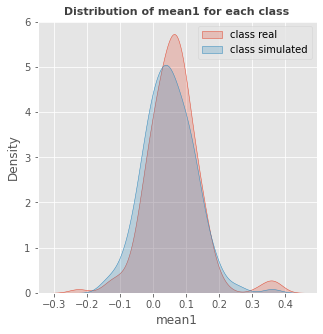

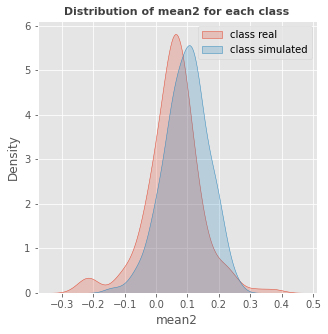

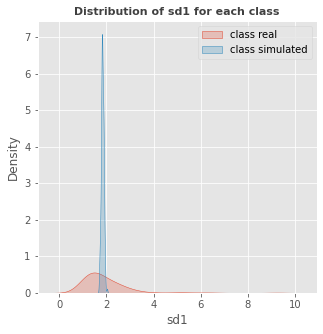

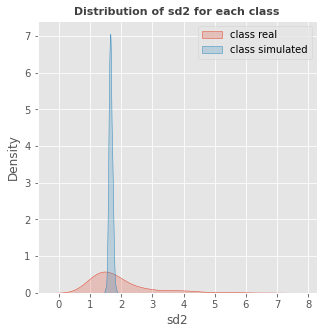

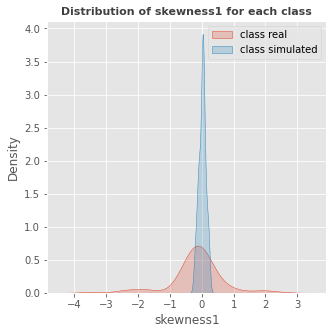

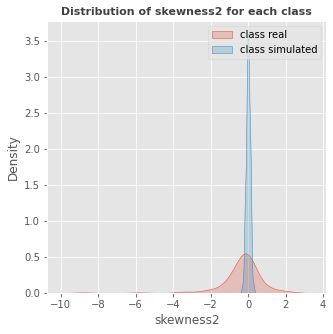

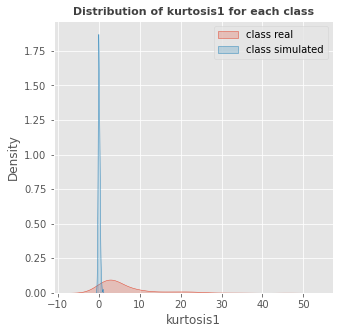

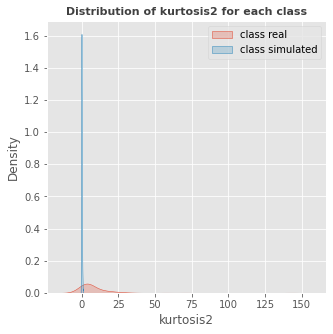

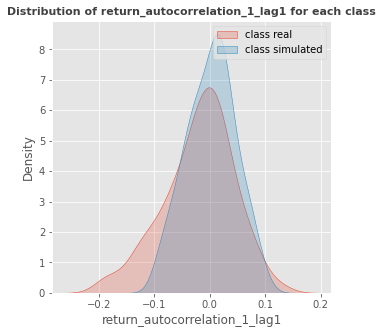

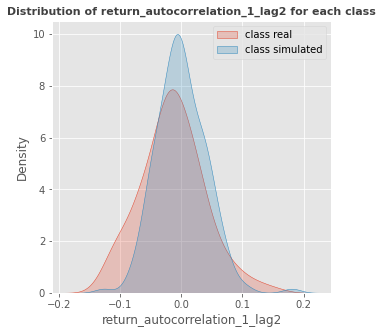

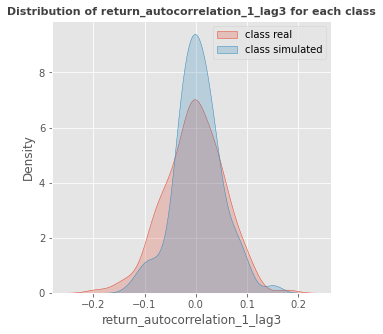

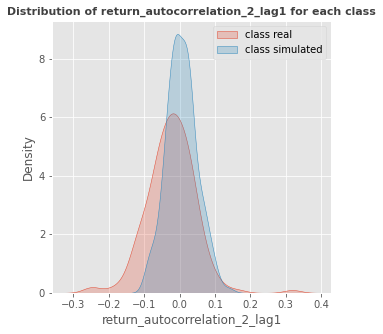

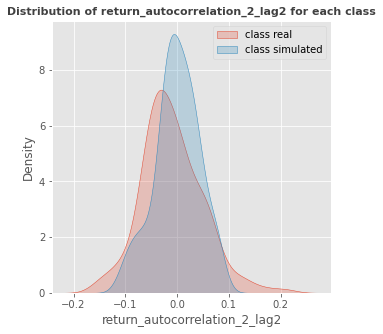

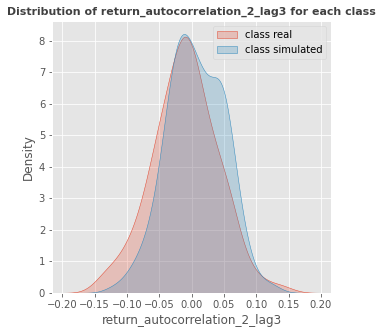

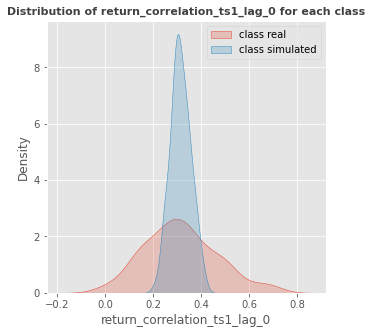

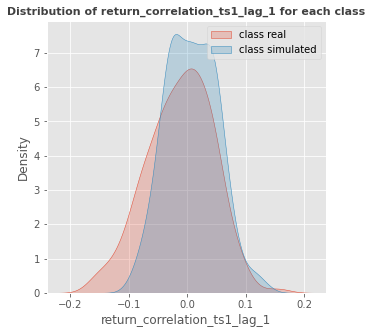

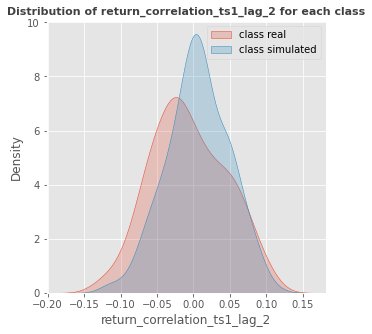

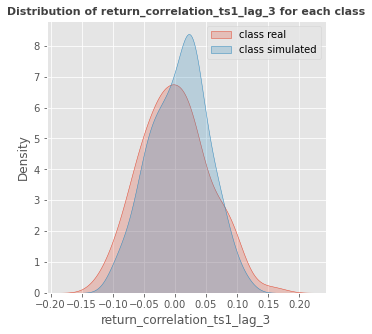

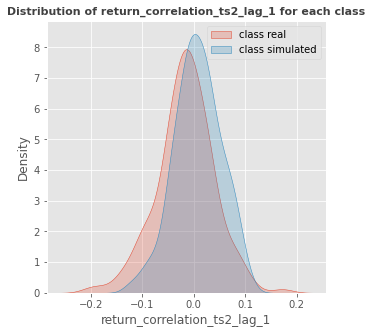

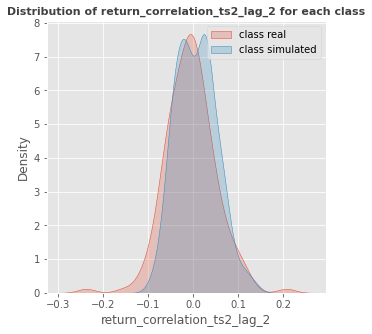

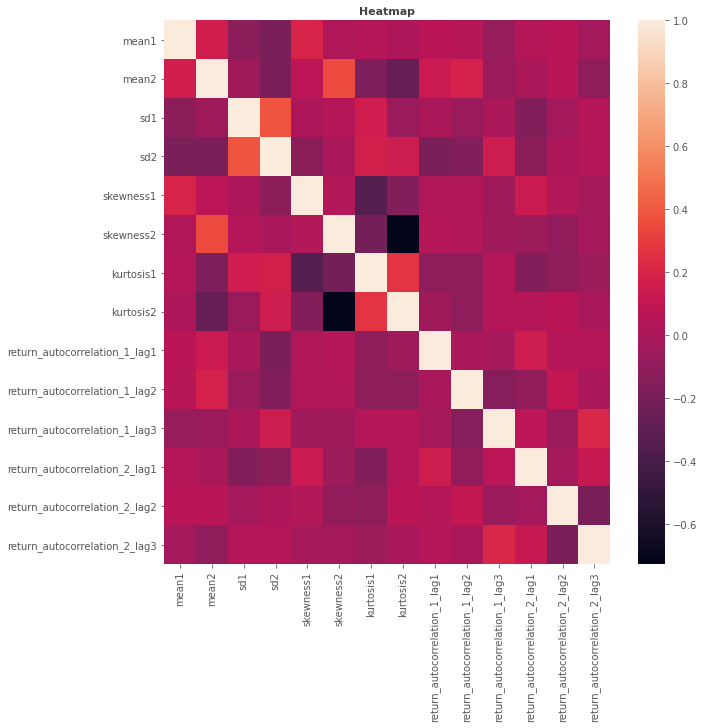

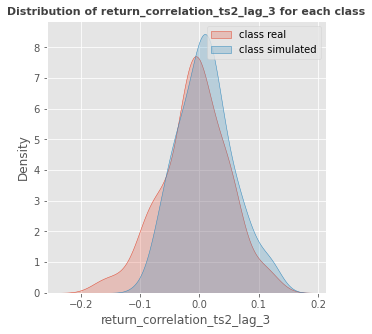

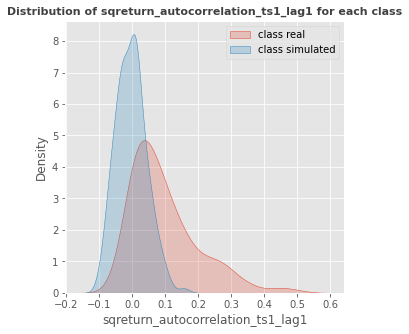

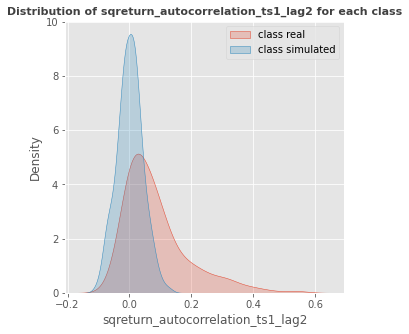

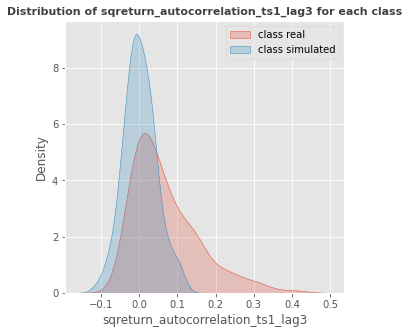

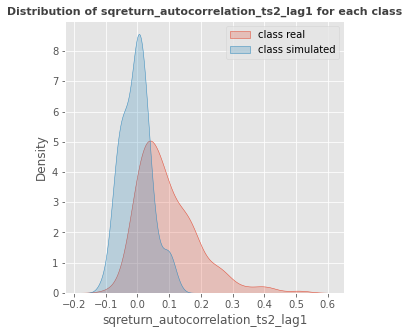

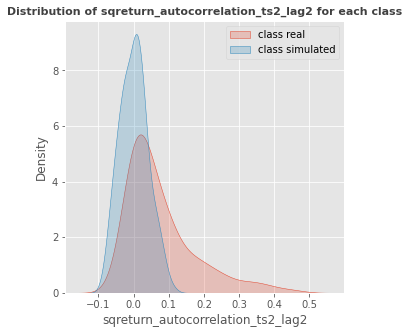

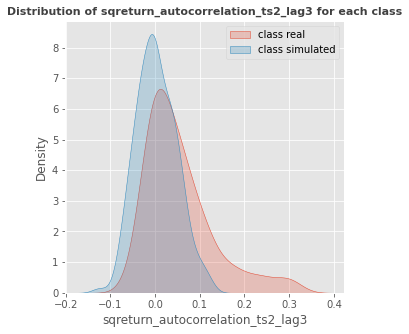

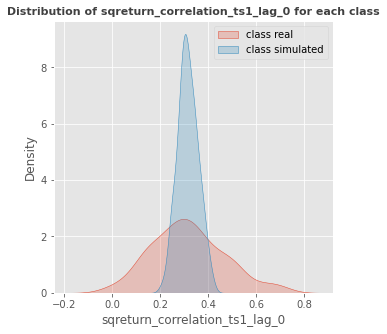

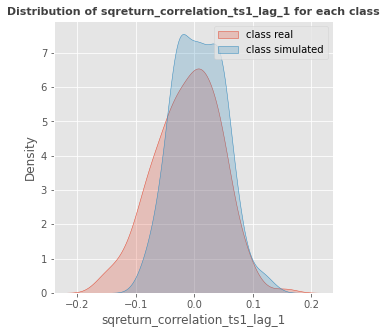

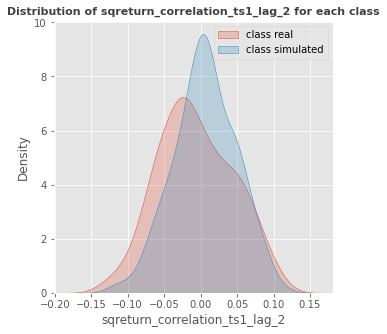

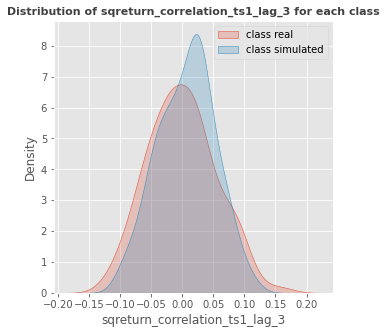

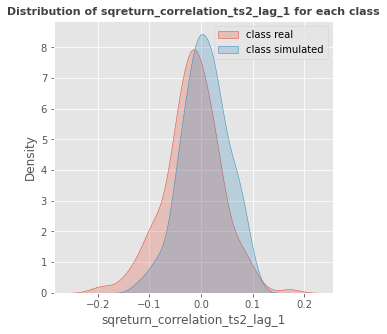

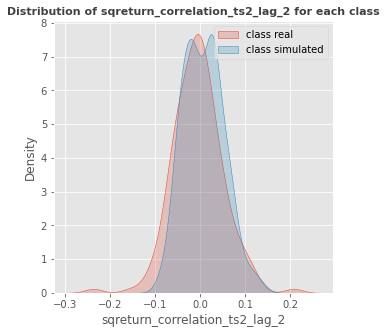

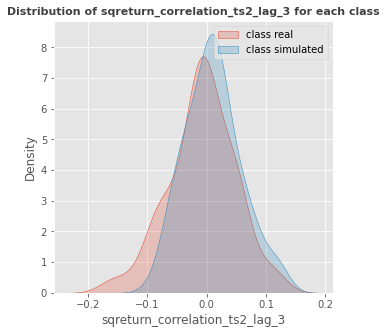

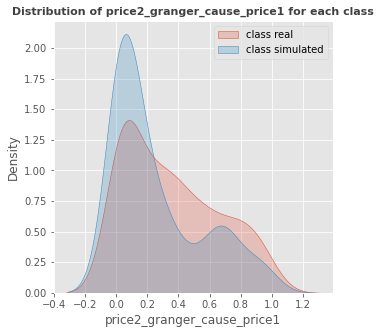

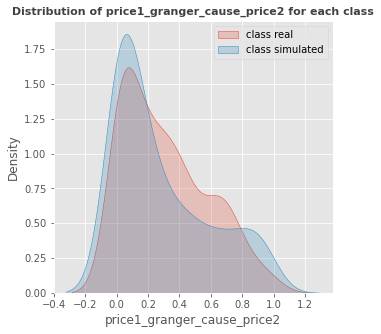

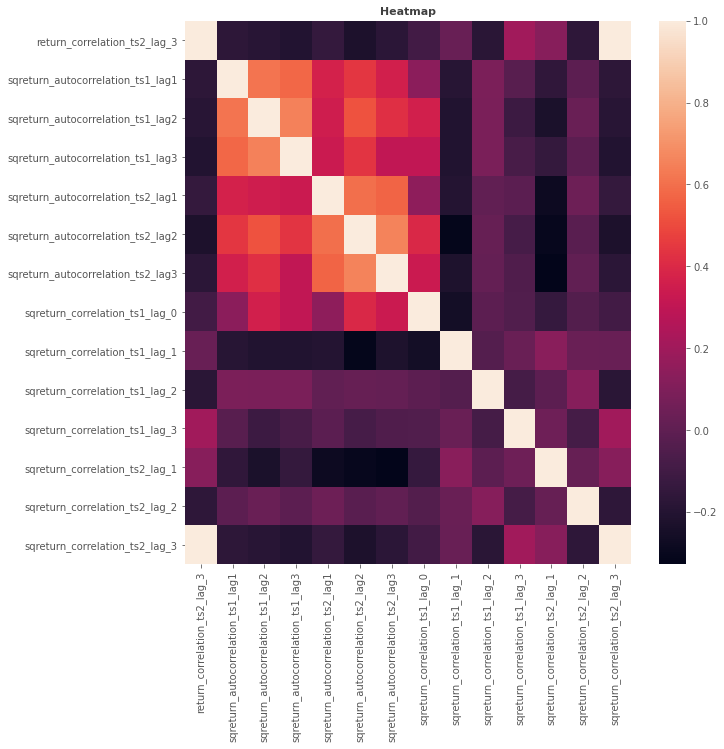

In [15]:
plt.rc('figure', max_open_warning = 0)
EDA.extensive_eda(X_train.iloc[:, 0:20], y_train, save_path="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/EDA_ou")
EDA.extensive_eda(X_train.iloc[:, 20:36], y_train, save_path="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_ou/EDA_ou")